<a href="https://colab.research.google.com/github/rizkyprofs/ML_DL/blob/main/UAS_regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
import torch

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

new_columns = ["target"] + [f"fitur_{i}" for i in range(1, 91)]
df = pd.read_csv("RegresiUTSTelkom.csv", names=new_columns)


# Set seed for reproducibility
def set_seed(seed=42):
    np.random.seed(seed)
    torch.manual_seed(seed)
    random.seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)


set_seed(42)

# Data Overview


In [ ]:
df.head()

target   fitur_1   fitur_2   fitur_3   fitur_4   fitur_5   fitur_6  \
0    2001  49.94357  21.47114  73.07750   8.74861 -17.40628 -13.09905   
1    2001  48.73215  18.42930  70.32679  12.94636 -10.32437 -24.83777   
2    2001  50.95714  31.85602  55.81851  13.41693  -6.57898 -18.54940   
3    2001  48.24750  -1.89837  36.29772   2.58776   0.97170 -26.21683   
4    2001  50.97020  42.20998  67.09964   8.46791 -15.85279 -16.81409   

    fitur_7   fitur_8   fitur_9  fitur_10  fitur_11  fitur_12  fitur_13  \
0 -25.01202 -12.23257   7.83089  -2.46783   3.32136  -2.31521  10.20556   
1   8.76630  -0.92019  18.76548   4.59210   2.21920   0.34006  44.38997   
2  -3.27872  -2.35035  16.07017   1.39518   2.73553   0.82804   7.46586   
3   5.05097 -10.34124   3.55005  -6.36304   6.63016  -3.35142  37.64085   
4 -12.48207  -9.37636  12.63699   0.93609   1.60923   2.19223  47.32082   

     fitur_14    fitur_15   fitur_16   fitur_17   fitur_18   fitur_19  \
0   611.10913   951.08960  698.11428  408.98485  383.70912  326.51512   
1  2056.93836   605.40696  457.41175  777.15347  415.64880  746.47775   
2   699.54544  1016.00954  594.06748  355.73663  507.39931  387.69910   
3  2174.08189   697.43346  459.24587  742.78961  229.30783  387.89697   
4   894.28471   809.86615  318.78559  435.04497  341.61467  334.30734   

    fitur_20   fitur_21   fitur_22   fitur_23   fitur_24  fitur_25   fitur_26  \
0  238.11327  251.42414  187.17351  100.42652  179.19498  -8.41558 -317.87038   
1  366.45320  317.82946  273.07917  141.75921  317.35269  19.48271  -65.25496   
2  287.15347  112.37152  161.68928  144.14353  199.29693  -4.24359 -297.00587   
3  249.06662  245.89870  176.20527   98.82222  150.97286  78.49057  -62.00282   
4  322.99589  190.61921  235.84715   96.89517  210.58870   5.60463 -199.63958   

    fitur_27   fitur_28   fitur_29  fitur_30  fitur_31  fitur_32  fitur_33  \
0   95.86266   48.10259  -95.66303 -18.06215   1.96984  34.42438  11.72670   
1  162.75145  135.00765  -96.28436 -86.87955  17.38087  45.90742  32.49908   
2 -148.36392   -7.94726  -18.71630  12.77542 -25.37725   9.71410   0.13843   
3   43.49659  -96.42719 -108.96608  14.22854  14.54178 -23.55608 -39.36953   
4  204.85812  -77.17695  -65.79741  -6.95097 -12.15262  -3.85410  20.68990   

   fitur_34  fitur_35  fitur_36   fitur_37   fitur_38   fitur_39   fitur_40  \
0   1.36790   7.79444  -0.36994 -133.67852  -83.26165  -37.29765   73.04667   
1 -32.85429  45.10830  26.84939 -302.57328  -41.71932 -138.85034  202.18689   
2  26.79723   6.30760  28.70107  -74.89005 -289.19553 -166.26089   13.09302   
3 -43.59209  20.83714  35.63919 -181.34947  -93.66614  -90.55616   -0.01744   
4 -20.30480  37.15045  11.20673 -124.09519 -295.98542  -33.31169   28.68782   

   fitur_41   fitur_42  fitur_43  fitur_44  fitur_45  fitur_46   fitur_47  \
0 -37.36684   -3.13853 -24.21531 -13.23066  15.93809 -18.60478   82.15479   
1 -33.44277  195.04749 -16.93235  -1.09168 -25.38061 -12.19034 -125.94783   
2   5.89085    6.89034 -10.97160   1.67565  11.43523  -7.27994  133.08169   
3  23.22717  -25.48348 -25.88070  12.59198 -24.85116  -7.20736  778.02248   
4 -32.73982  -26.60955 -69.07501   5.73467 -15.47984 -15.55296  150.29661   

    fitur_48   fitur_49  fitur_50  fitur_51  fitur_52  fitur_53  fitur_54  \
0  240.57980  -10.29407  31.58431 -25.38187  -3.90772  13.29258  41.55060   
1  121.74212  136.67075  41.18157  28.55107   1.52298  70.99515 -43.63073   
2  141.86758  -56.99356  98.15952  18.50939  16.97216  24.26629 -10.50788   
3   61.15940   23.37585 -97.64925   4.56917 -37.32280   4.15159  12.24315   
4  176.95972   58.18014  25.96952  45.25506  10.42226  27.88782 -17.12676   

   fitur_55   fitur_56   fitur_57   fitur_58   fitur_59  fitur_60  fitur_61  \
0  -7.26272  -21.00863  105.50848   64.29856   26.08481 -44.59110  -8.30657   
1 -42.55014  129.82848   79.95420  -87.14554  -45.75446 -65.82100 -43.90031   
2  -8.68412   54.75759  194.74034    7.95966  -18.22685   0.06463  -2.63069   
3

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515345 entries, 0 to 515344
Data columns (total 91 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   target    515345 non-null  int64  
 1   fitur_1   515345 non-null  float64
 2   fitur_2   515345 non-null  float64
 3   fitur_3   515345 non-null  float64
 4   fitur_4   515345 non-null  float64
 5   fitur_5   515345 non-null  float64
 6   fitur_6   515345 non-null  float64
 7   fitur_7   515345 non-null  float64
 8   fitur_8   515345 non-null  float64
 9   fitur_9   515345 non-null  float64
 10  fitur_10  515345 non-null  float64
 11  fitur_11  515345 non-null  float64
 12  fitur_12  515345 non-null  float64
 13  fitur_13  515345 non-null  float64
 14  fitur_14  515345 non-null  float64
 15  fitur_15  515345 non-null  float64
 16  fitur_16  515345 non-null  float64
 17  fitur_17  515345 non-null  float64
 18  fitur_18  515345 non-null  float64
 19  fitur_19  515345 non-null  float64
 20  fitu

In [ ]:
df.describe()

target        fitur_1        fitur_2        fitur_3  \
count  515345.000000  515345.000000  515345.000000  515345.000000   
mean     1998.397082      43.387126       1.289554       8.658347   
std        10.931046       6.067558      51.580351      35.268585   
min      1922.000000       1.749000    -337.092500    -301.005060   
25%      1994.000000      39.954690     -26.059520     -11.462710   
50%      2002.000000      44.258500       8.417850      10.476320   
75%      2006.000000      47.833890      36.124010      29.764820   
max      2011.000000      61.970140     384.065730     322.851430   

             fitur_4        fitur_5        fitur_6        fitur_7  \
count  515345.000000  515345.000000  515345.000000  515345.000000   
mean        1.164124      -6.553601      -9.521975      -2.391089   
std        16.322790      22.860785      12.857751      14.571873   
min      -154.183580    -181.953370     -81.794290    -188.214000   
25%        -8.487500     -20.666450     -18.440990     -10.780600   
50%        -0.652840      -6.007770     -11.188390      -2.046670   
75%         8.787540       7.741870      -2.388960       6.508580   
max       335.771820     262.068870     166.236890     172.402680   

             fitur_8        fitur_9       fitur_10       fitur_11  \
count  515345.000000  515345.000000  515345.000000  515345.000000   
mean       -1.793236       3.727876       1.882385      -0.146527   
std         7.963827      10.582861       6.530232       4.370848   
min       -72.503850    -126.479040     -41.631660     -69.680870   
25%        -6.468420      -2.293660      -2.444850      -2.652090   
50%        -1.736450       3.822310       1.783520      -0.097950   
75%         2.913450       9.961820       6.147220       2.435660   
max       126.741270     146.297950      60.345350      88.020820   

            fitur_12       fitur_13       fitur_14       fitur_15  \
count  515345.000000  515345.000000  515345.000000  515345.000000   
mean        2.546063      33.714006    2439.359375    1967.734202   
std         8.320190      22.259632    1749.367690    1261.484792   
min       -94.041960       0.132830       8.474200      21.214350   
25%        -2.550060      18.241520    1315.620990    1113.536420   
50%         2.313700      29.095100    2009.305690    1687.786820   
75%         7.360330      43.426010    3041.982080    2489.338150   
max        87.913240     549.764910   65735.779530   36816.790370   

            fitur_16       fitur_17       fitur_18       fitur_19  \
count  515345.000000  515345.000000  515345.000000  515345.000000   
mean     1514.859902     910.981344     879.146721     603.737434   
std      1092.831044     475.708203     576.865994     317.499288   
min        17.857900      12.150420       5.517710      19.808810   
25%       814.969650     606.538620     487.854780     392.372580   
50%      1240.769970     817.273320     739.485810     541.535110   
75%      1892.120350    1100.851520    1114.243410     740.737190   
max     31849.486760   19865.931970   16831.949030   11901.705150   

            fitur_20       fitur_21       fitur_22       fitur_23  \
count  515345.000000  515345.000000  515345.000000  515345.000000   
mean      517.579339     393.962215     325.733170     288.885085   
std       309.364735     214.013502     165.699383     186.960729   
min         6.254870       6.183760      15.307500       6.116440   
25%       318.616340     257.541700     214.016130     167.706090   
50%       444.776870     349.742980     292.736290     242.080960   
75%       626.968250     476.074910     397.491190     356.183990   
max      9569.778090    9616.615600    3721.873210    6737.121500   

            fitur_24       fitur_25       fitur_26       fitur_27  \
count  515345.000000  515345.000000  515345.000000  515345.000000   
mean      291.973238      43.031969      43.314873     -46.449006   
std       153.475649     121.429498     715.759147     544.879865   
min   

In [ ]:
df.duplicated().sum()

np.int64(214)

In [ ]:
df.isna().sum()

target      0
fitur_1     0
fitur_2     0
fitur_3     0
fitur_4     0
           ..
fitur_86    0
fitur_87    0
fitur_88    0
fitur_89    0
fitur_90    0
Length: 91, dtype: int64

# Exploratory Data Analysis


In [ ]:
def plot_kde(column_name):
    plt.figure(figsize=(10, 5))
    sns.kdeplot(df[column_name], fill=True, color="steelblue", linewidth=2)
    plt.title(f"Distribusi {column_name}", fontsize=16, fontweight="bold")
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel("Kepadatan", fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

## Univariate


In [ ]:
new_columns = ["target"] + [f"fitur_{i}" for i in range(1, 91)]
df = pd.read_csv("RegresiUTSTelkom.csv", names=new_columns)

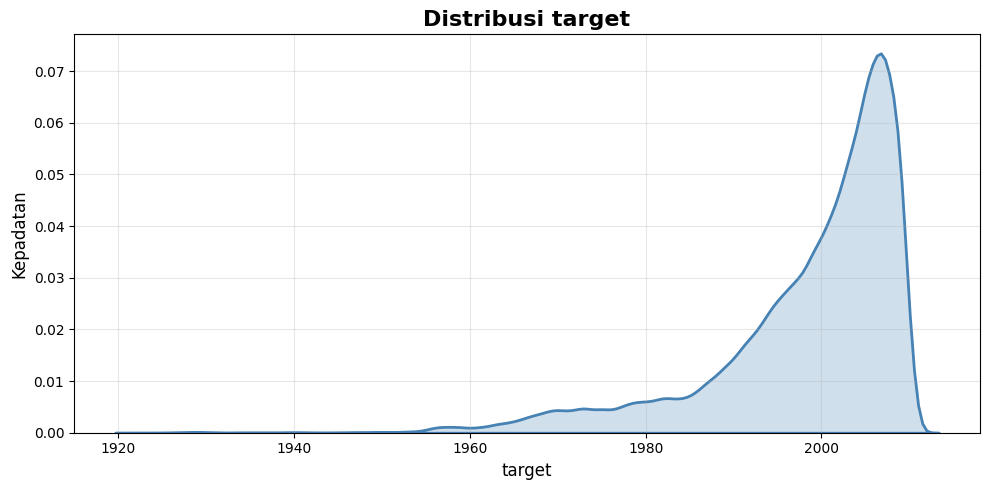

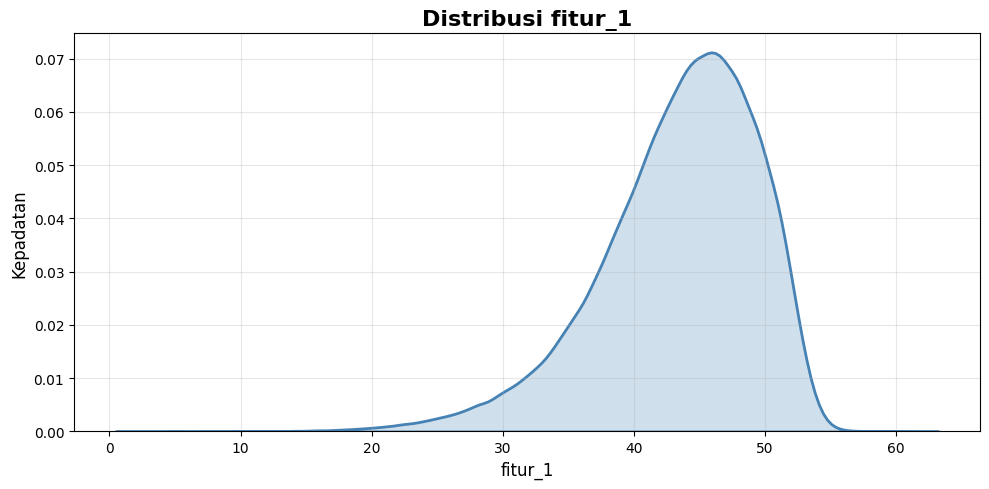

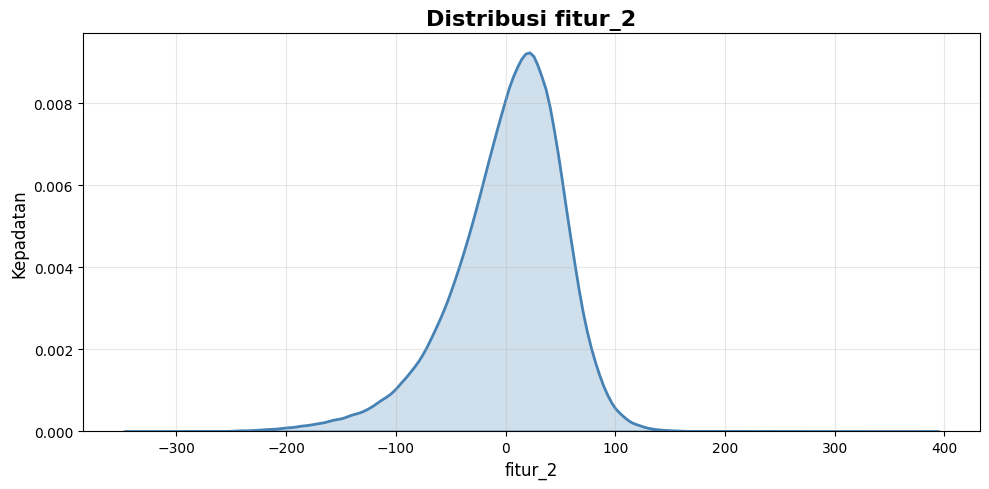

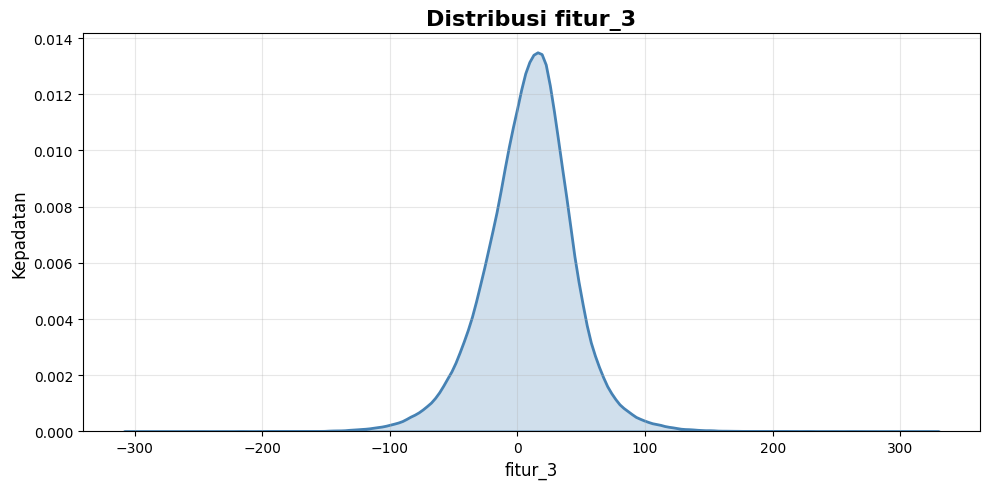

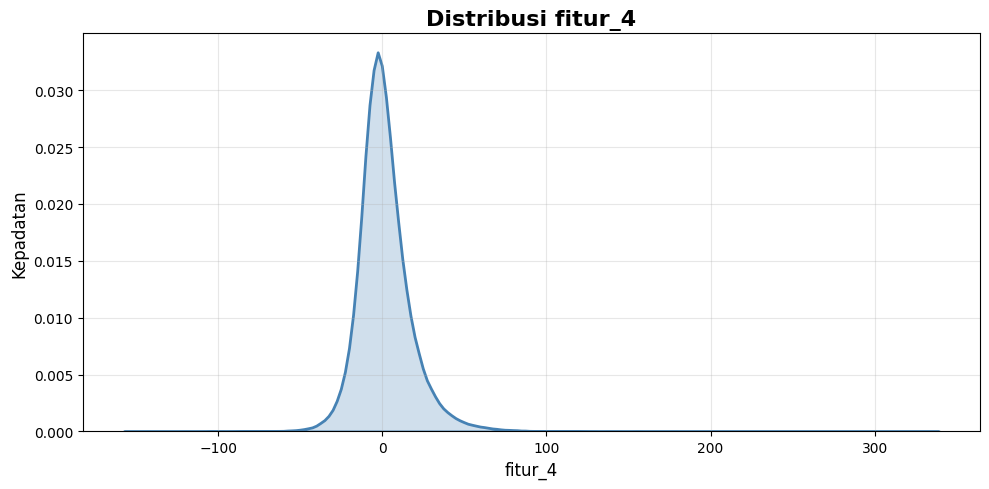

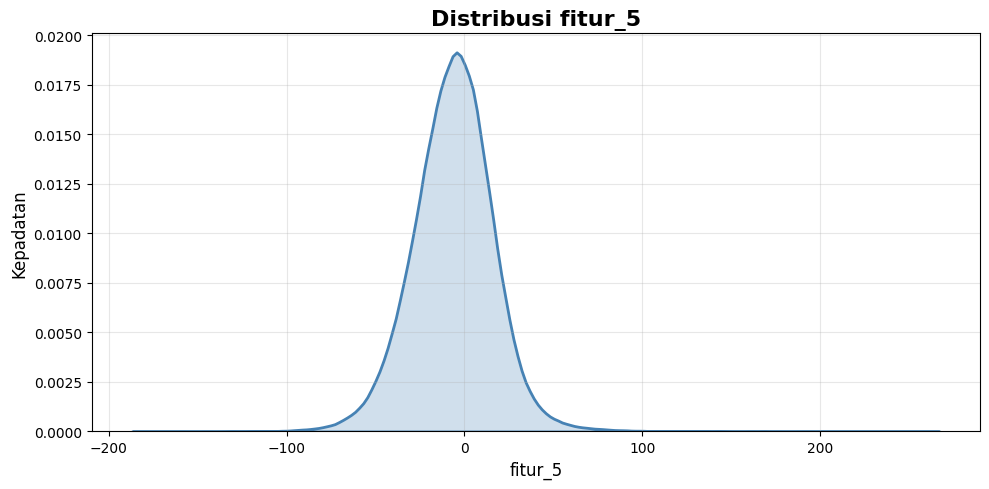

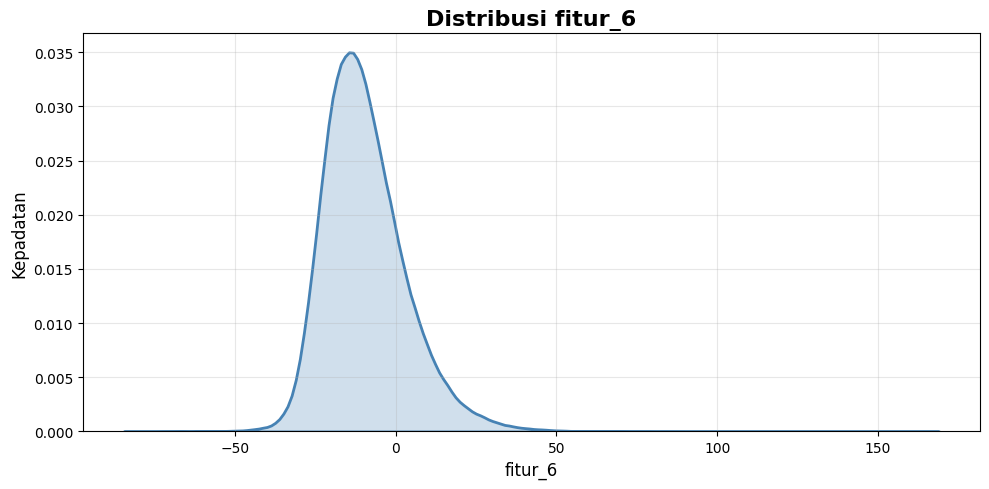

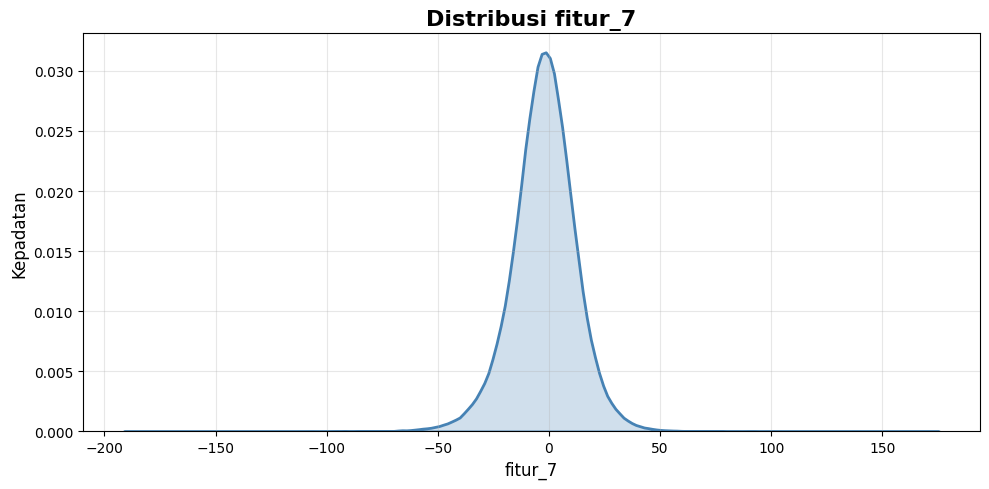

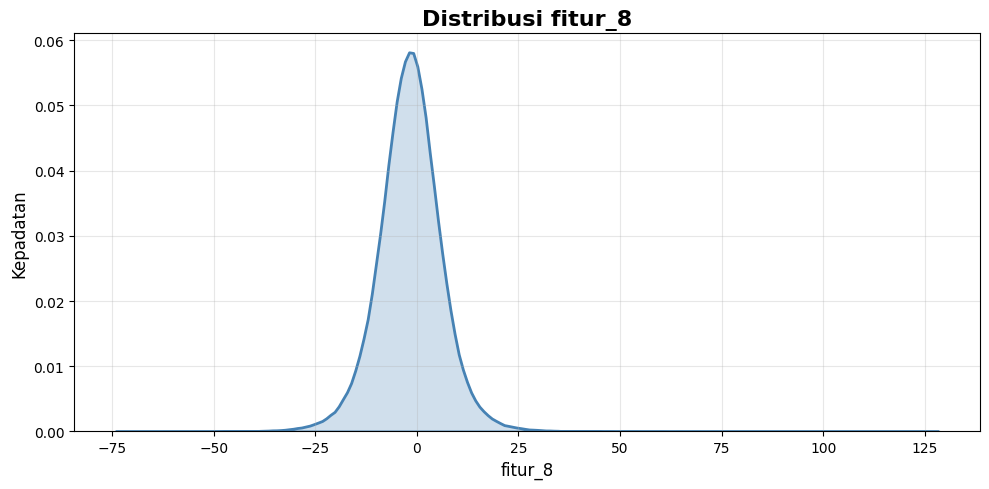

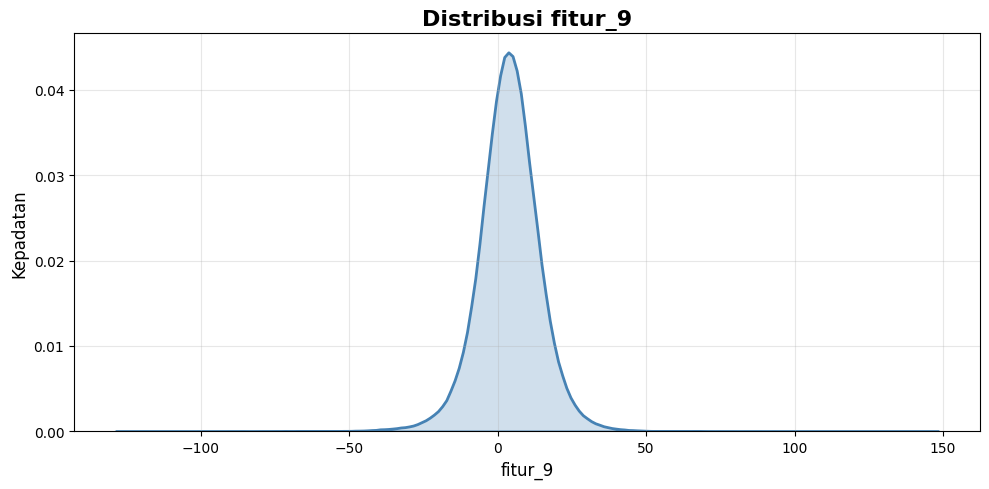

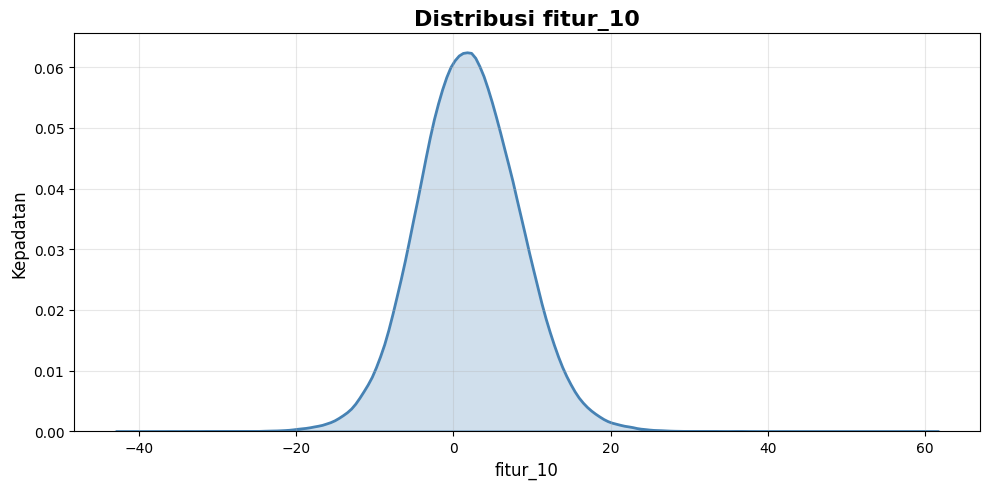

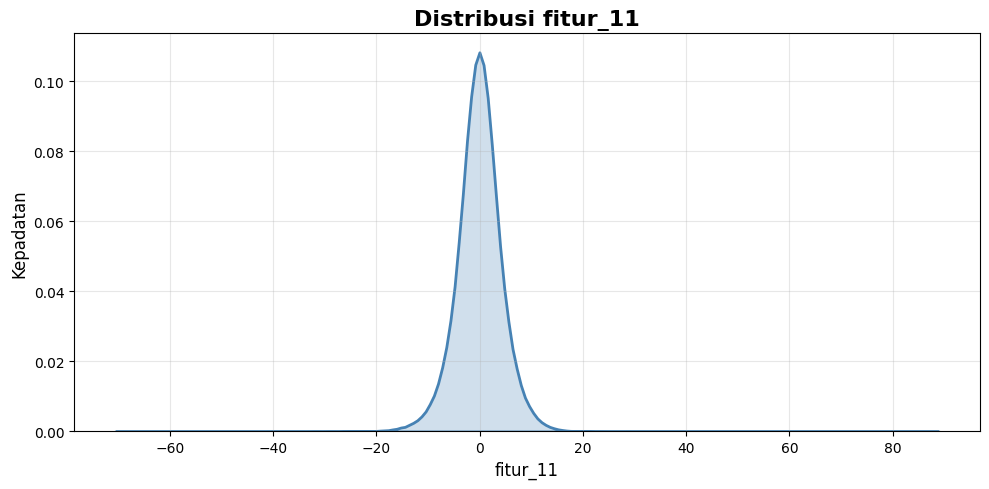

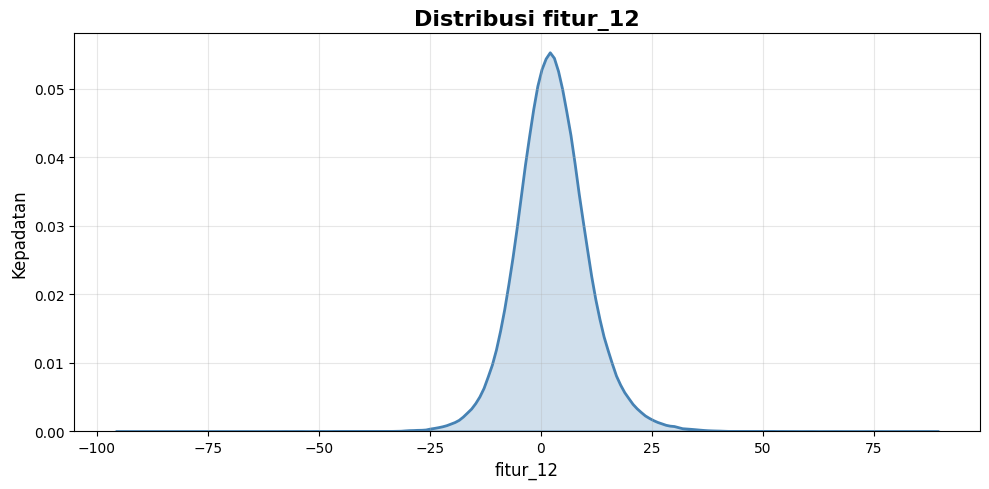

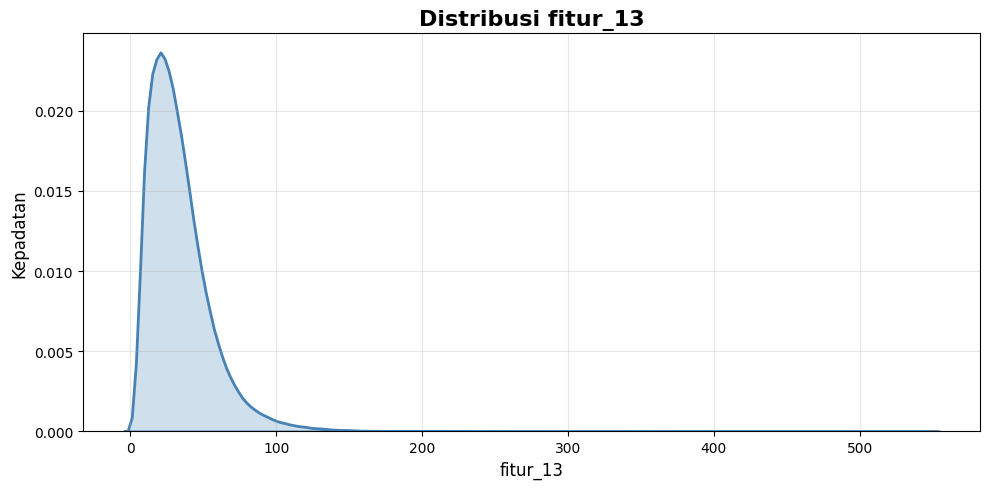

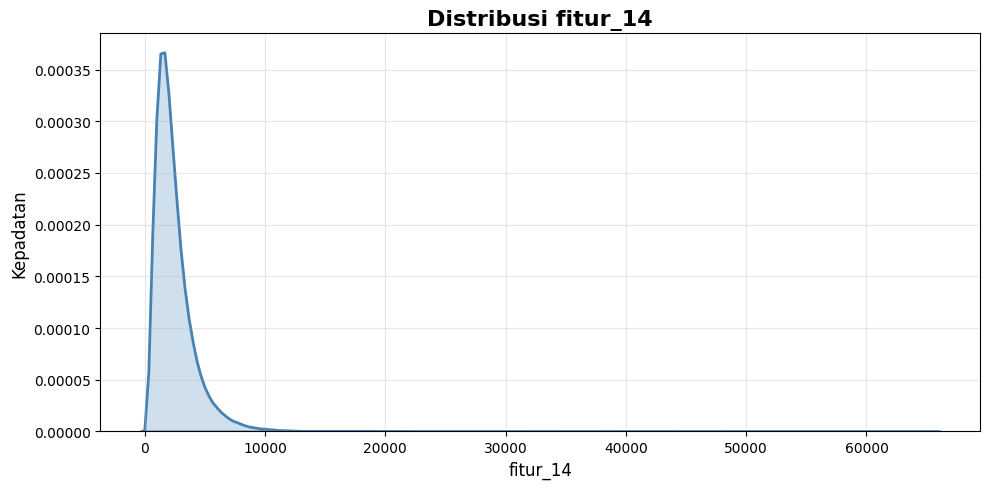

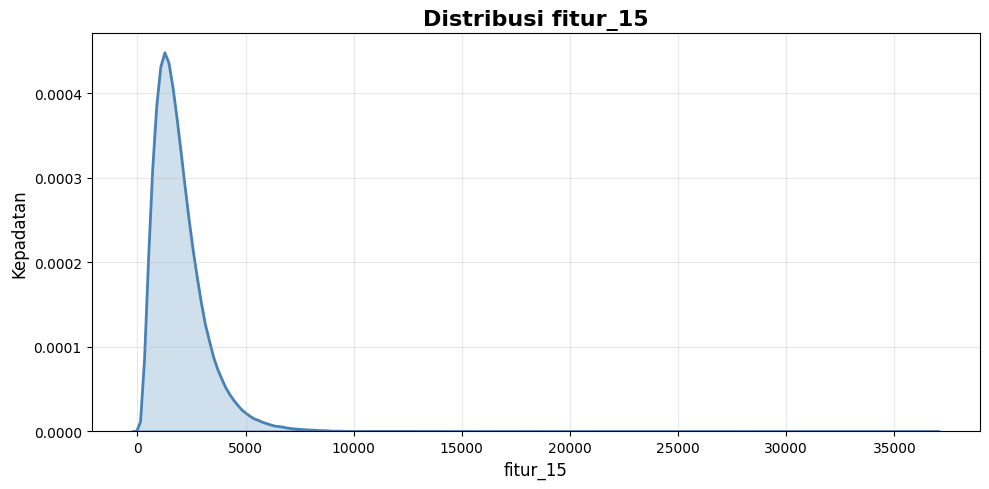

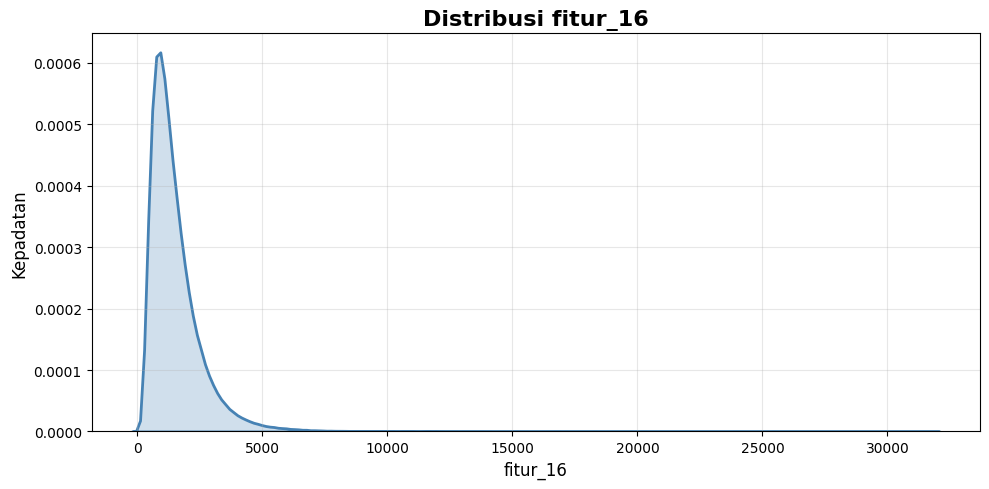

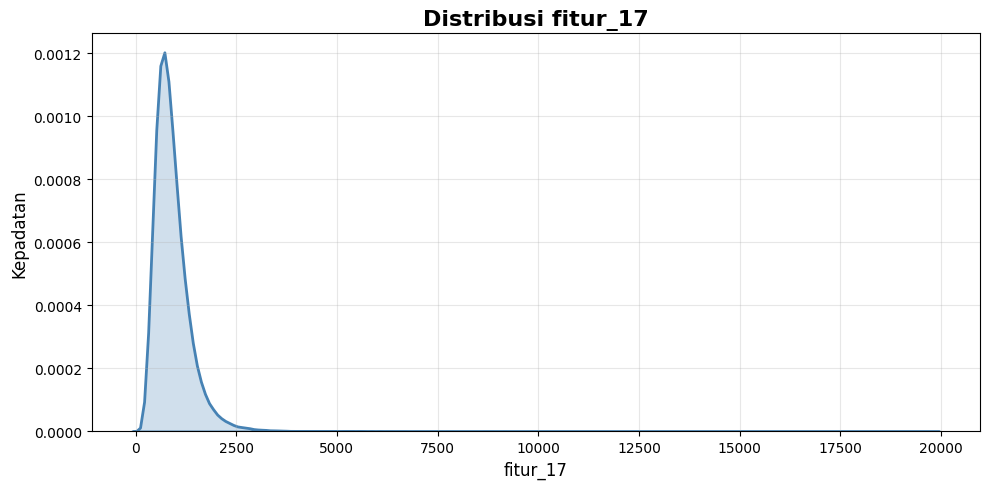

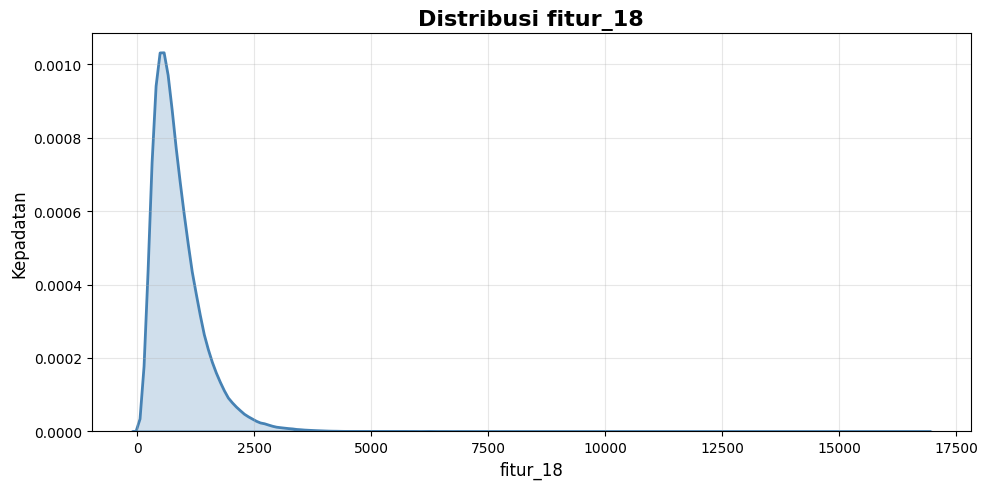

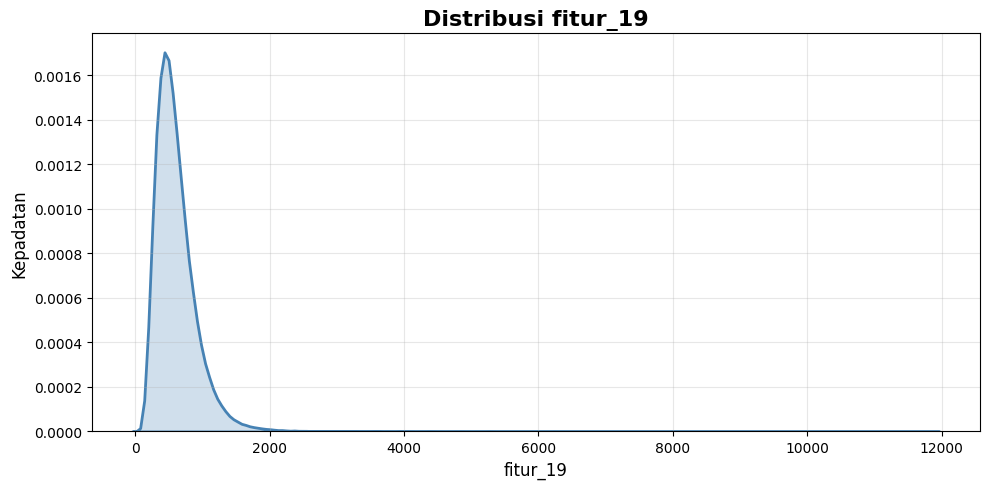

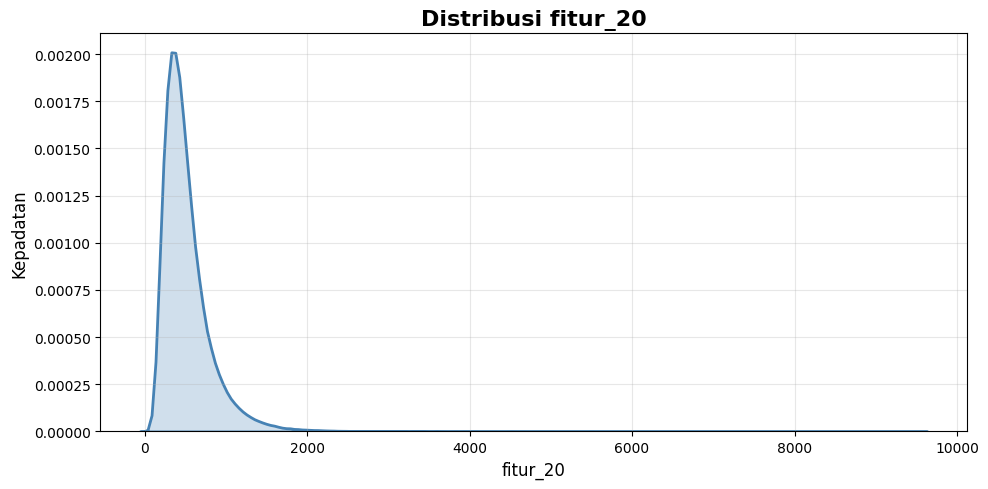

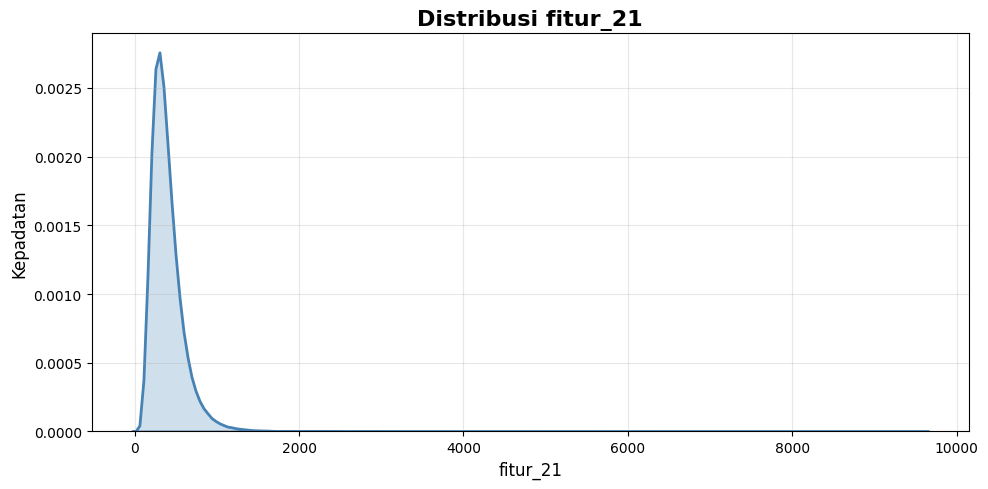

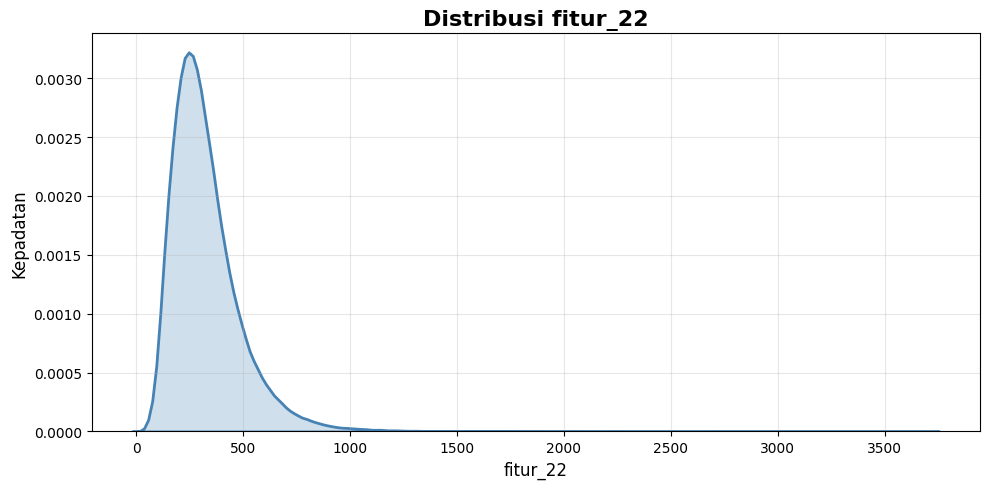

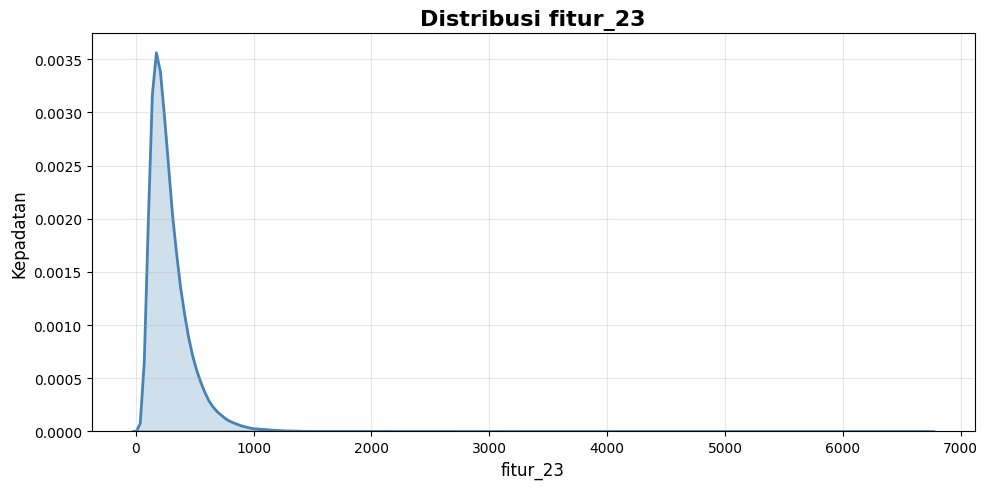

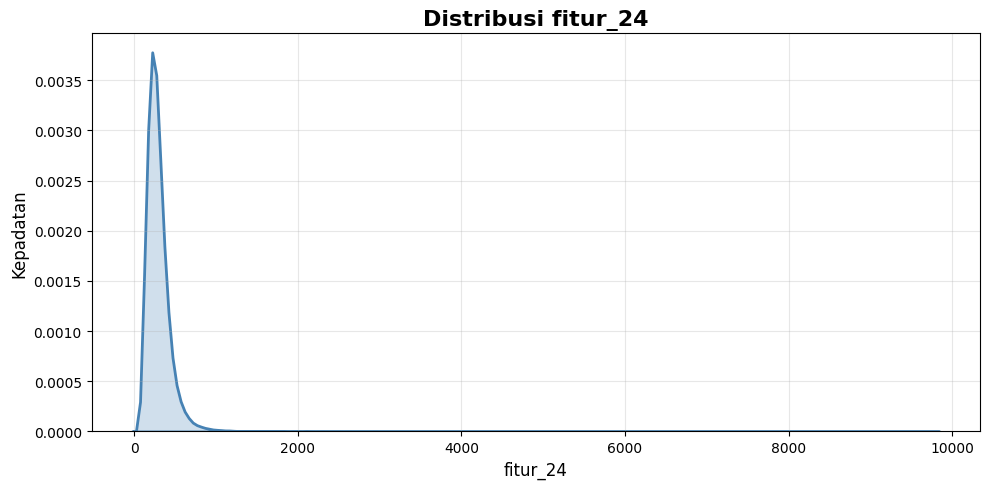

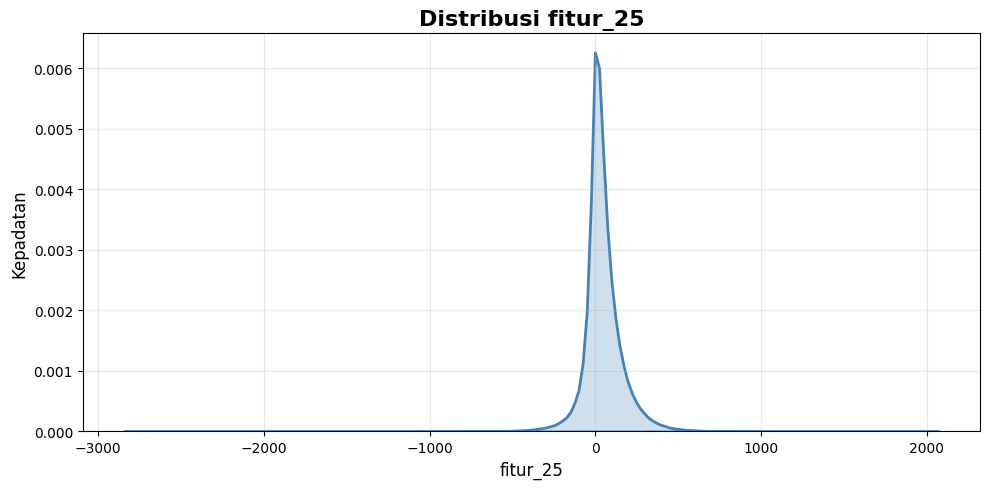

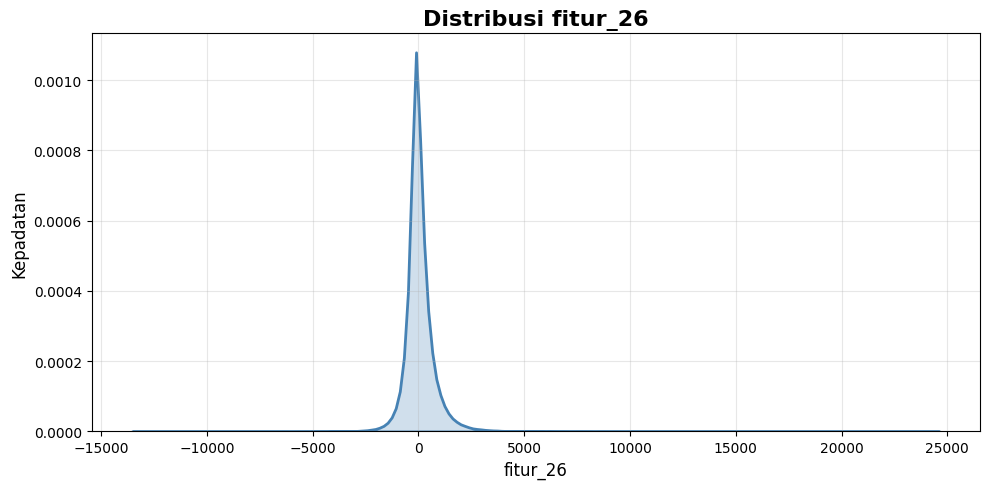

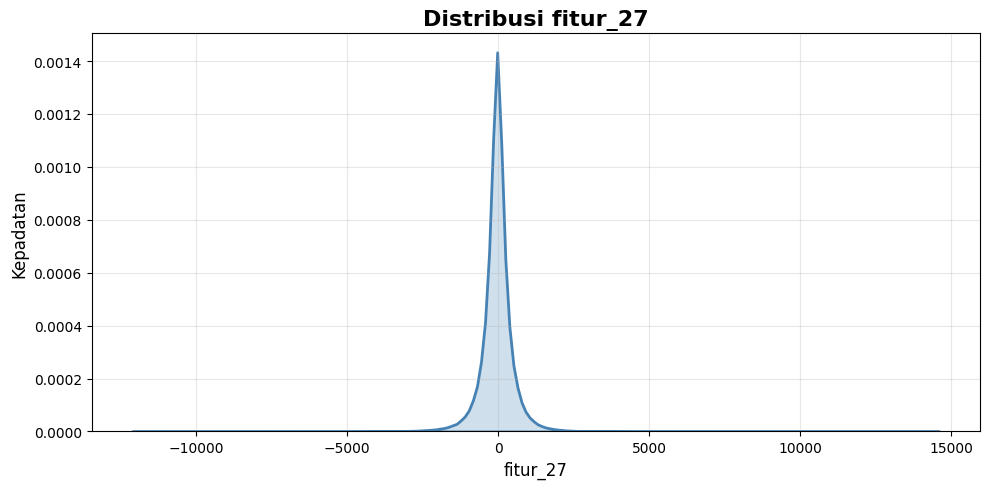

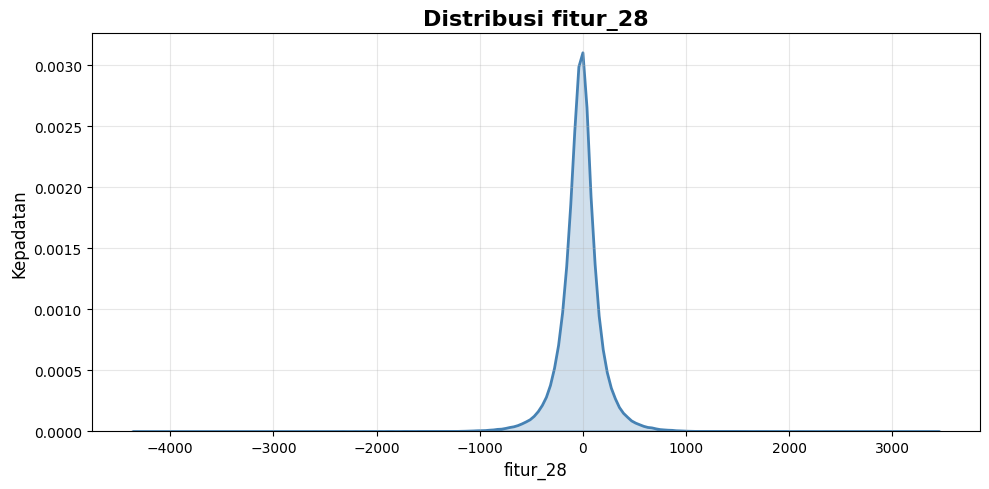

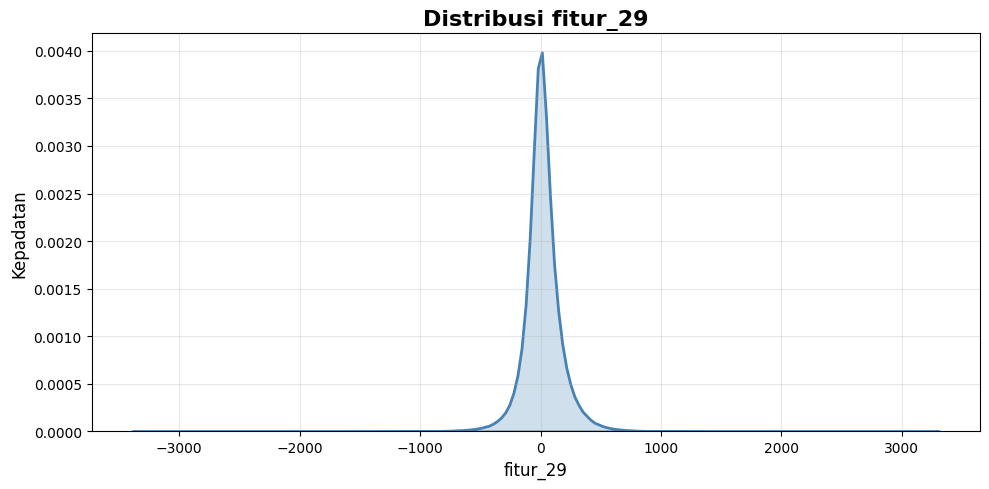

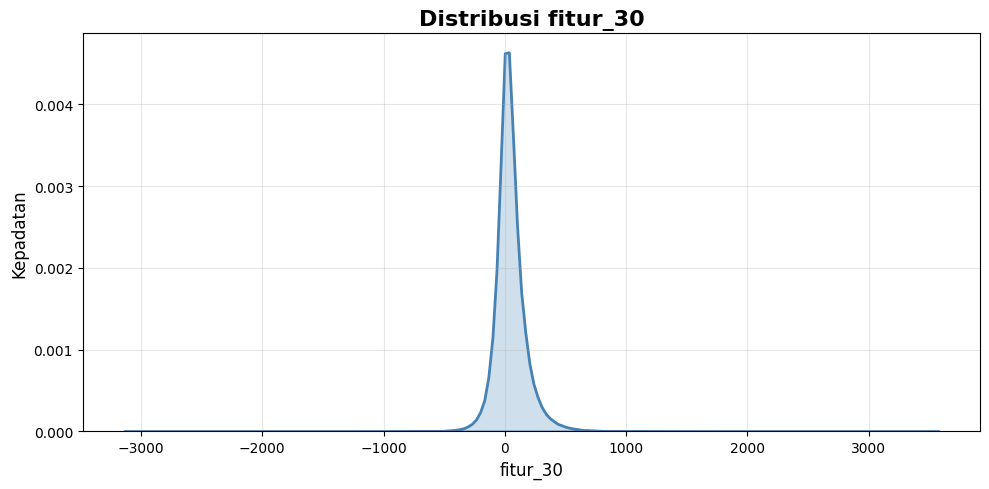

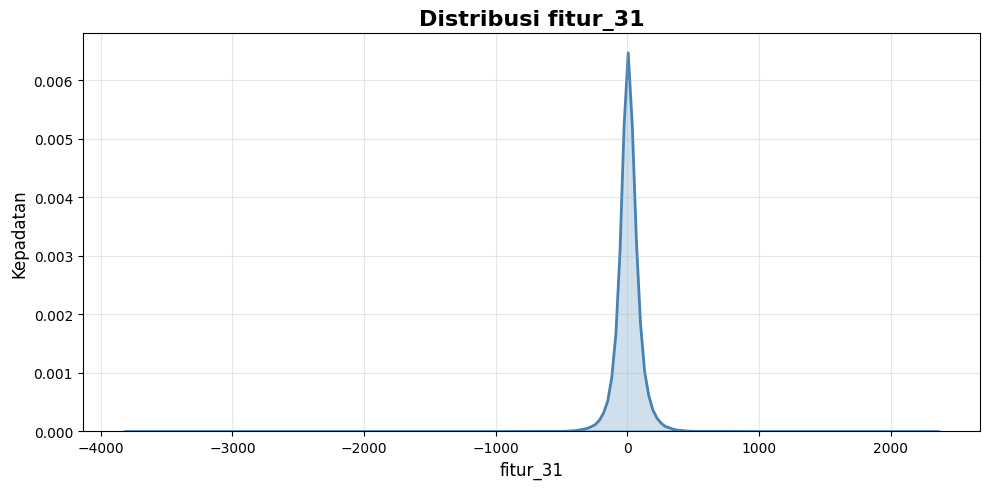

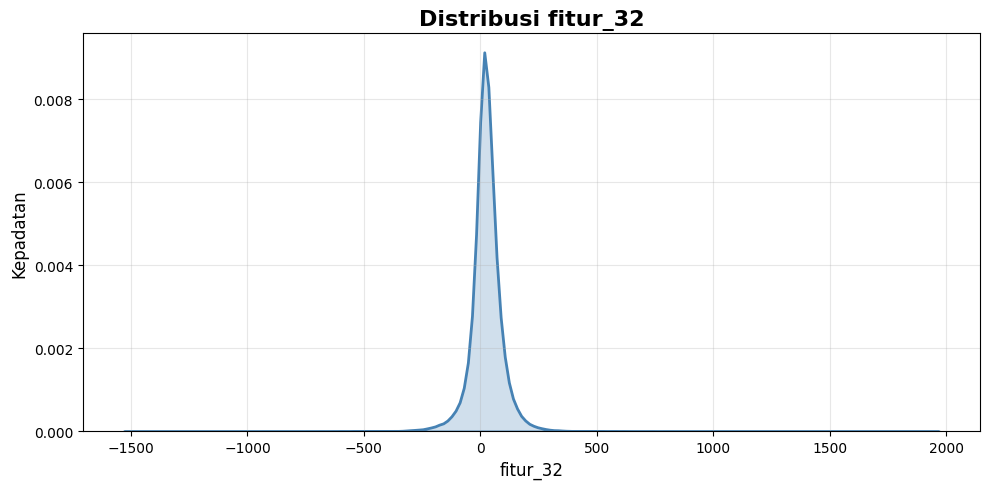

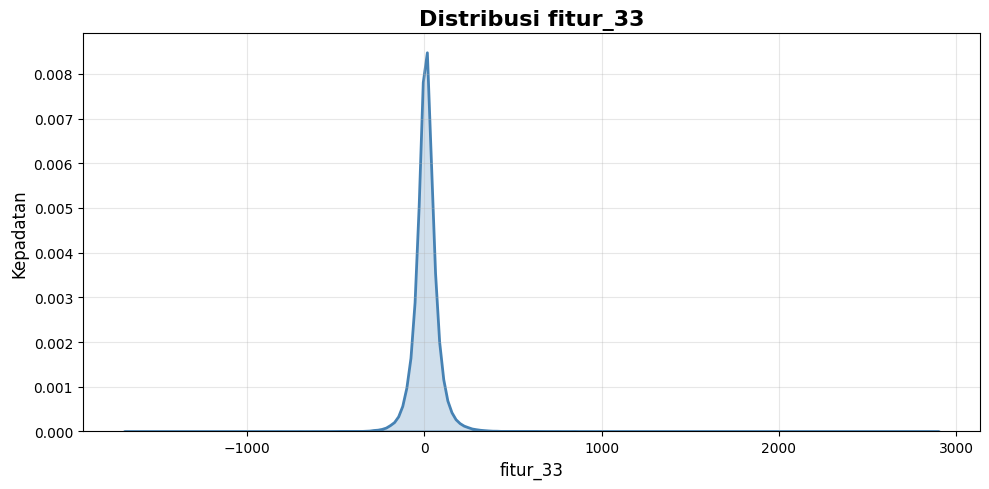

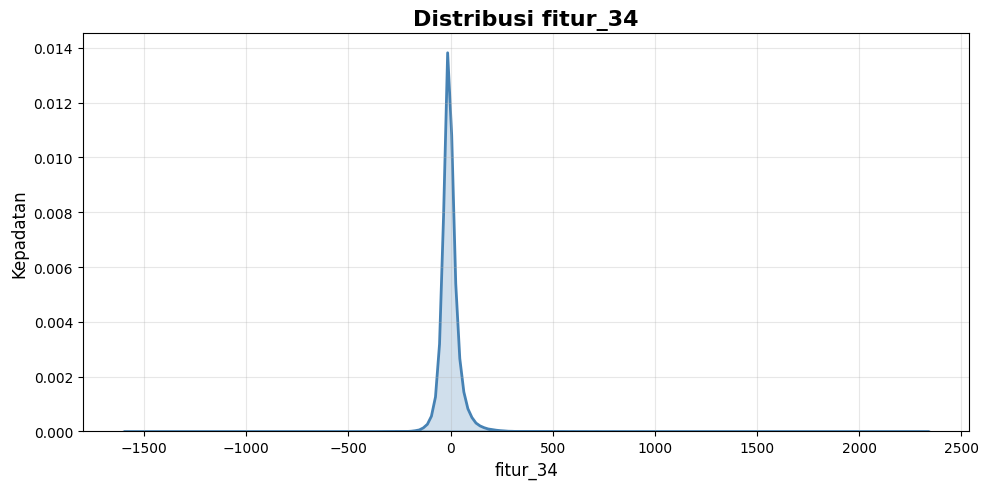

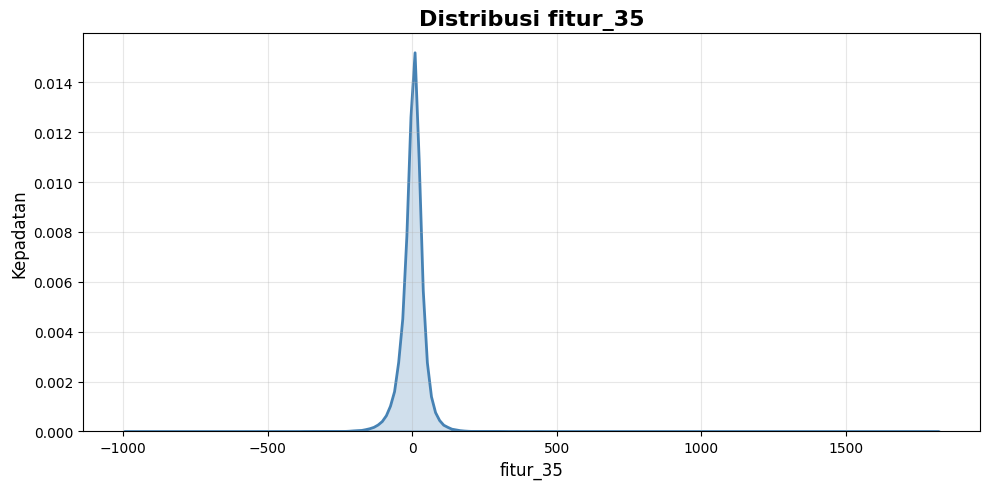

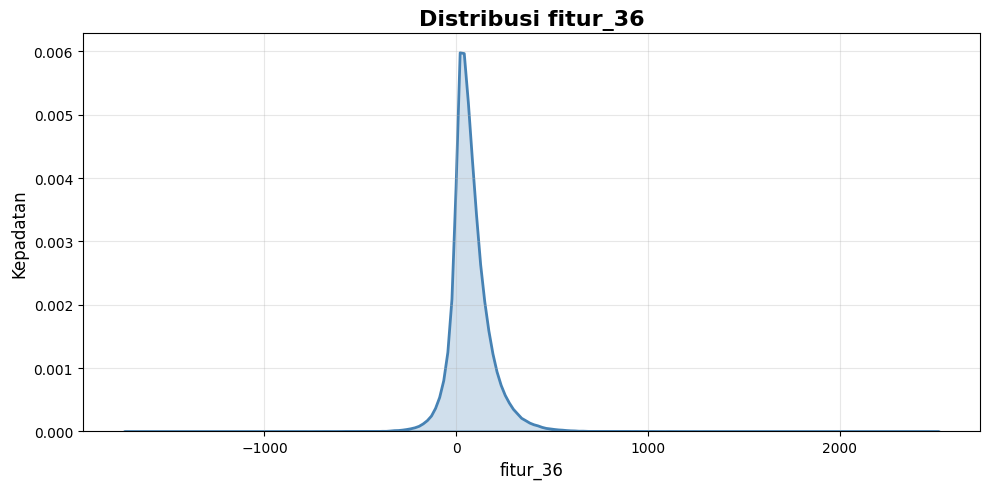

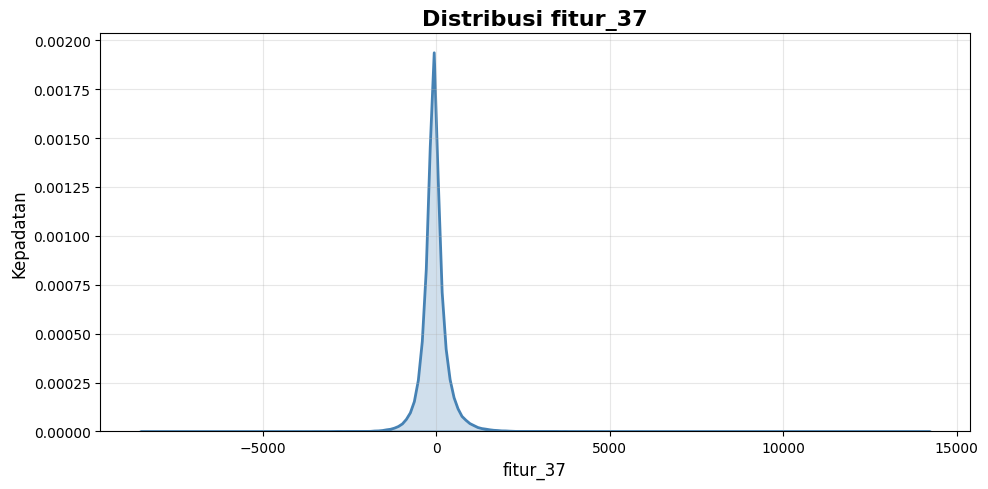

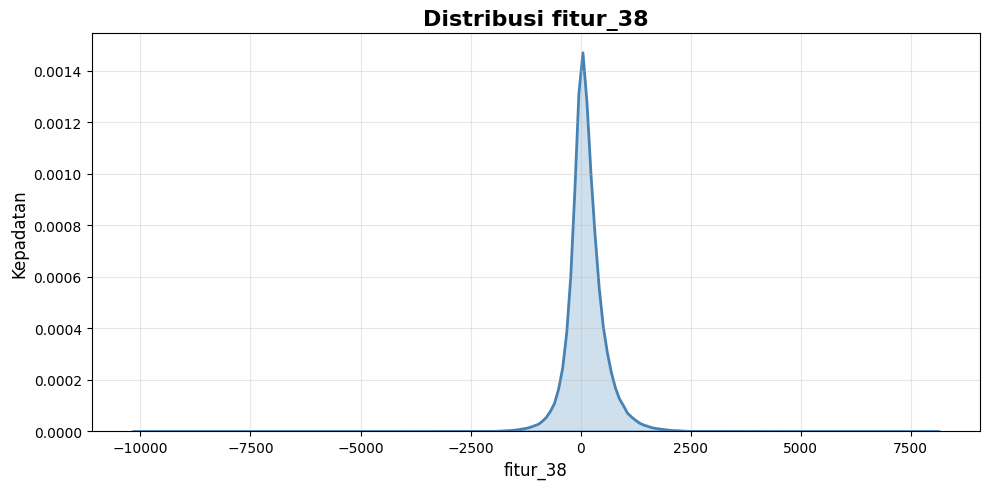

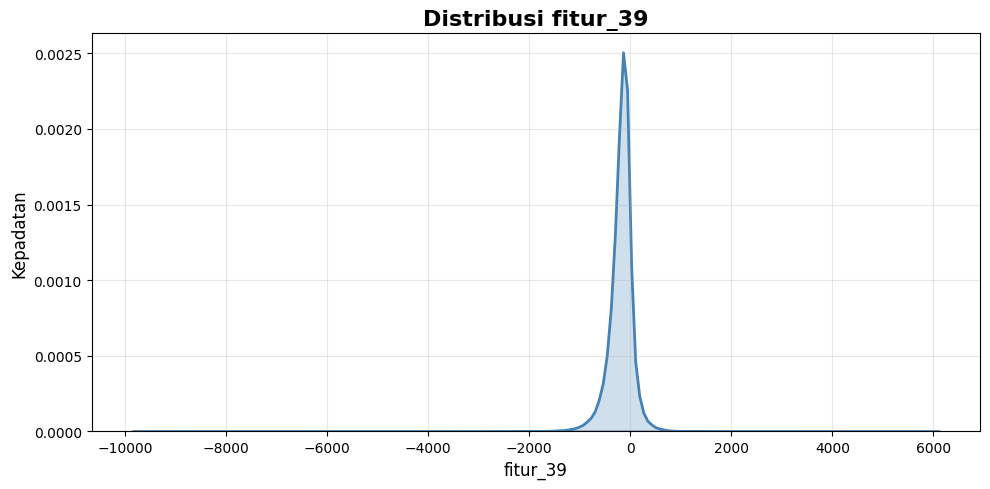

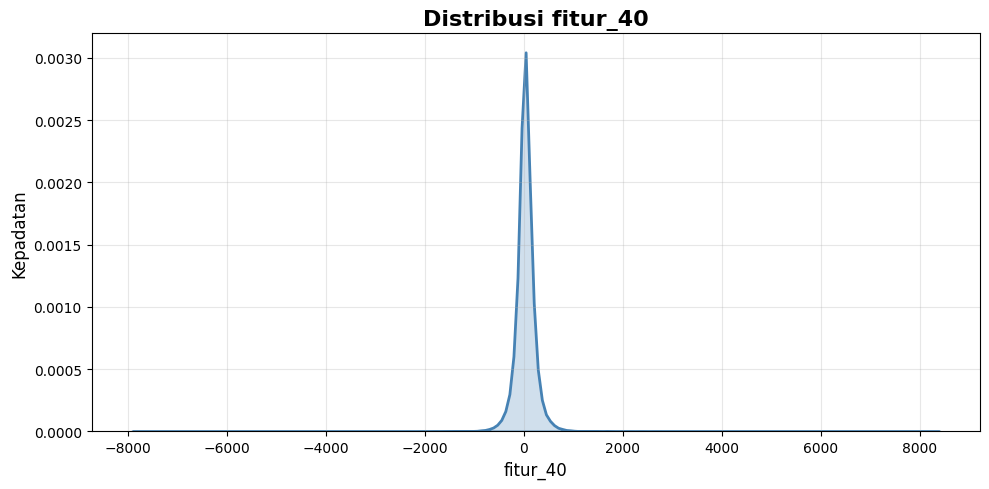

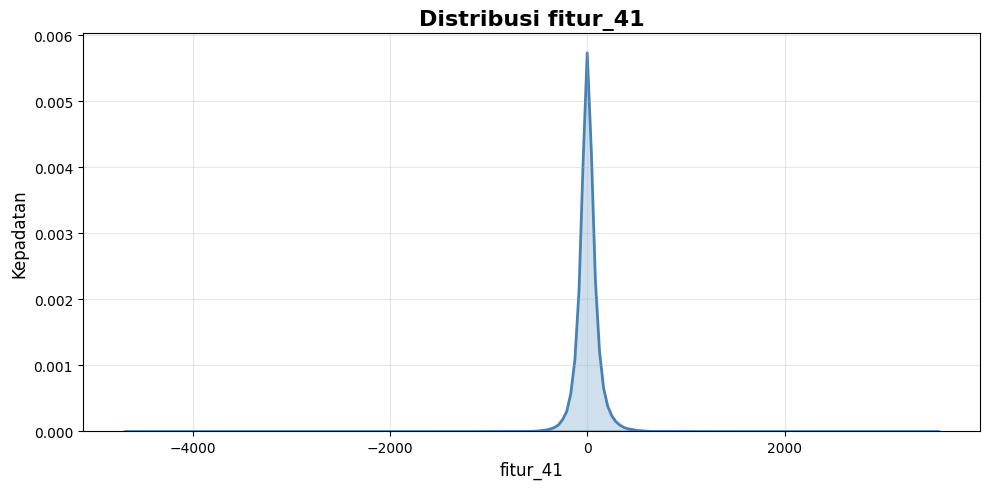

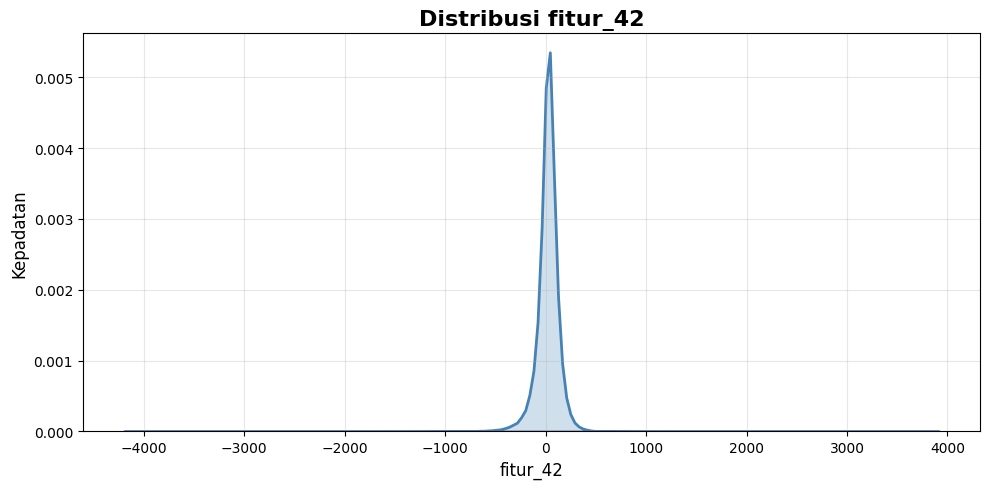

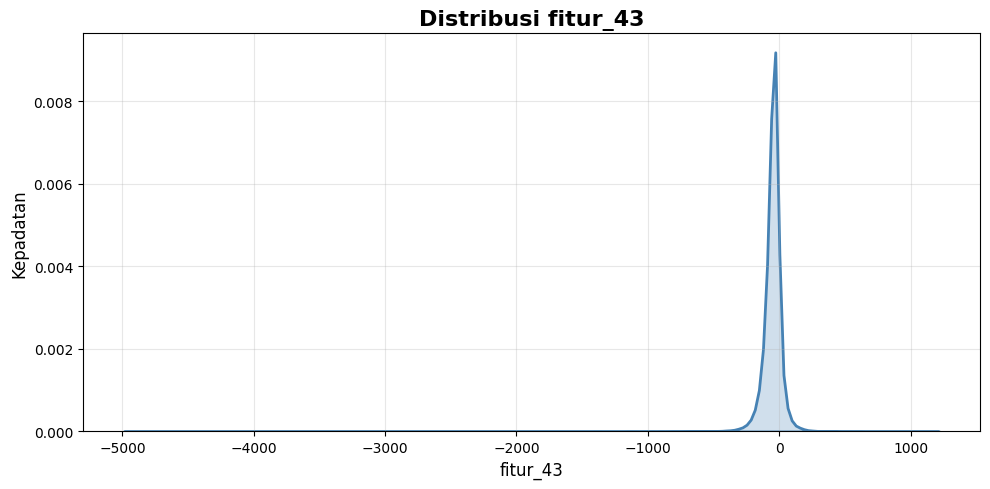

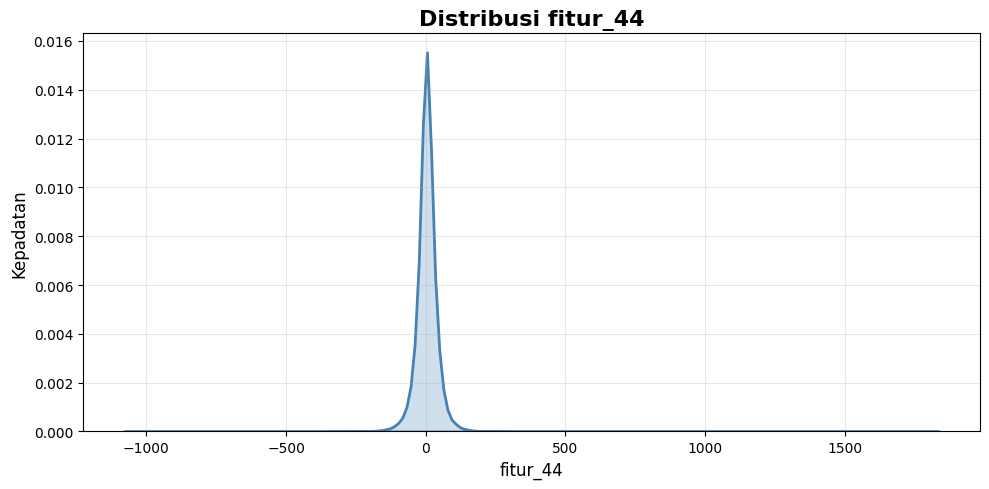

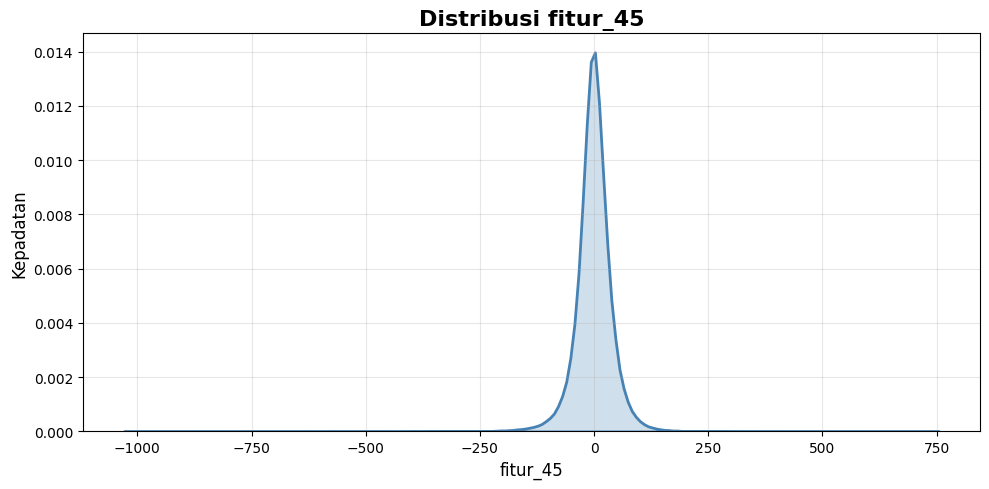

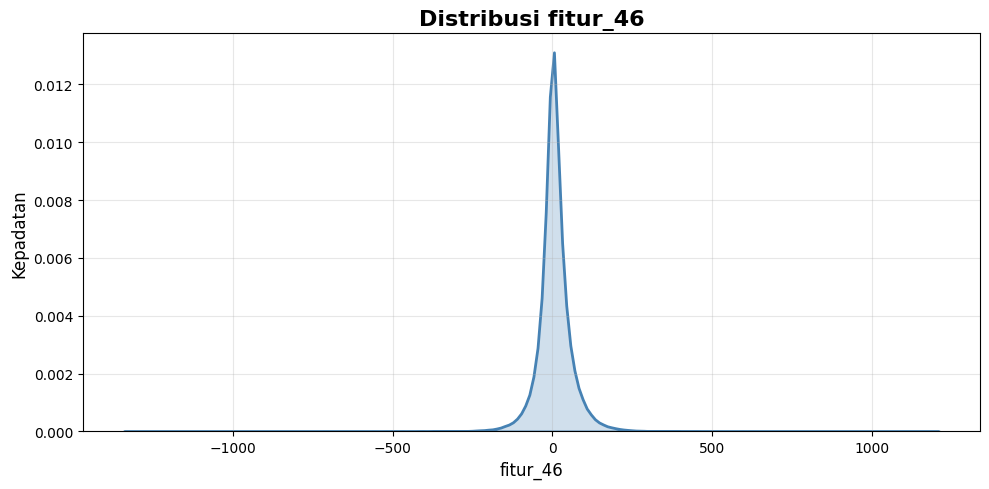

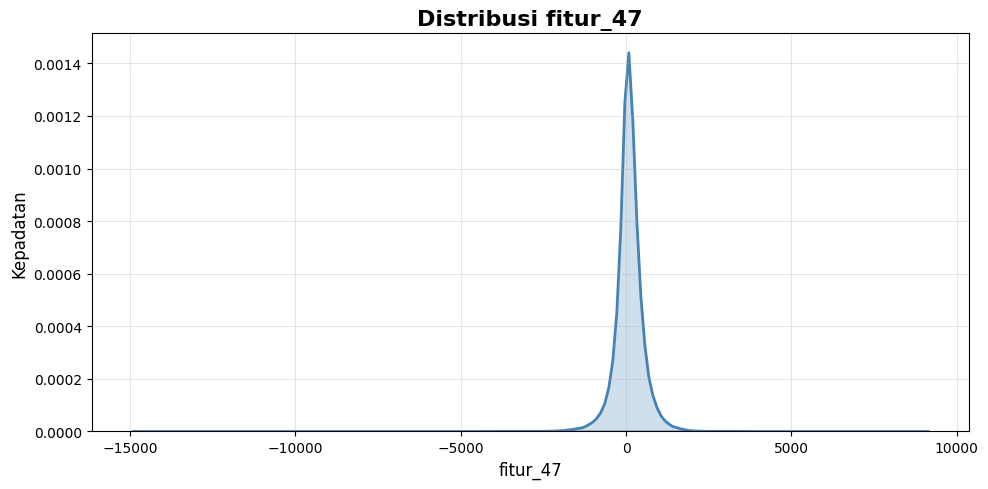

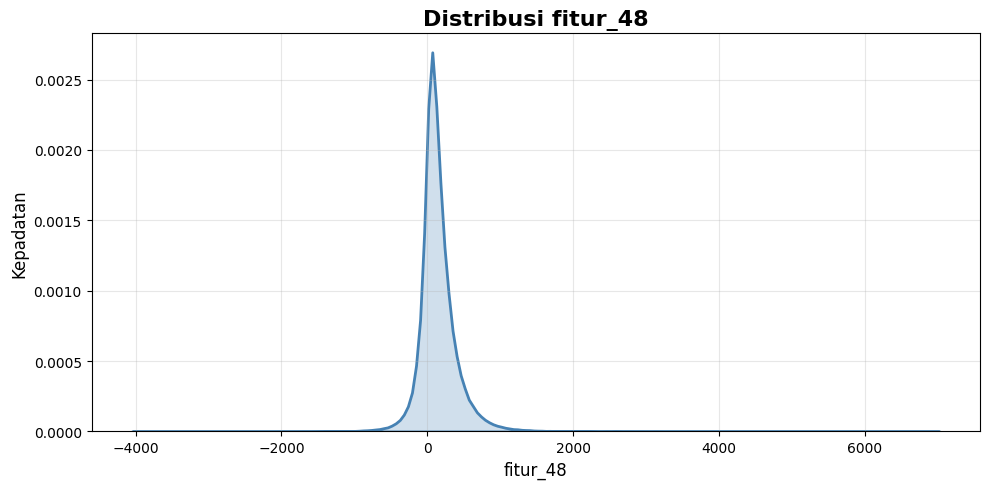

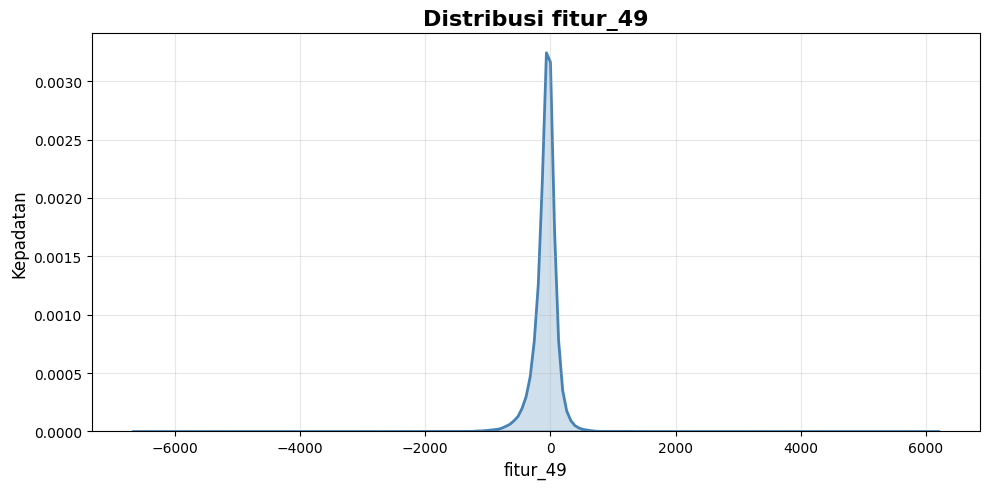

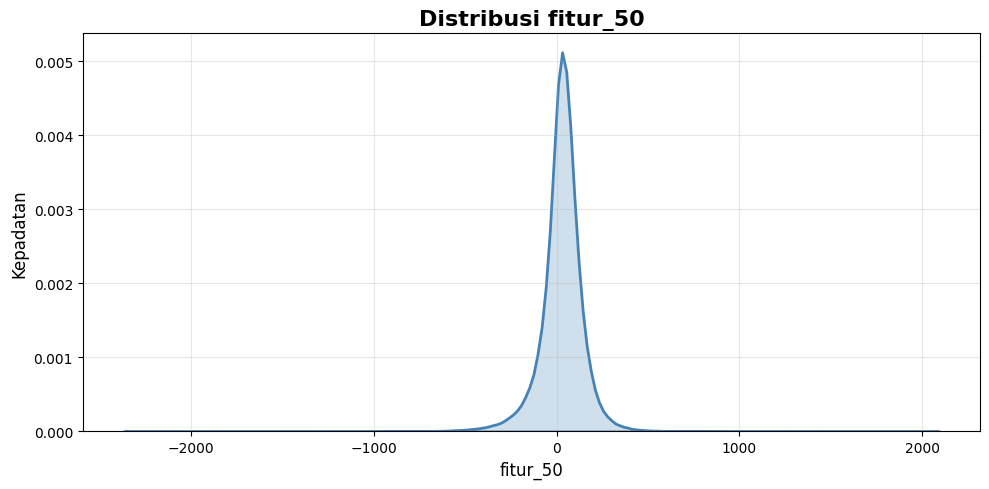

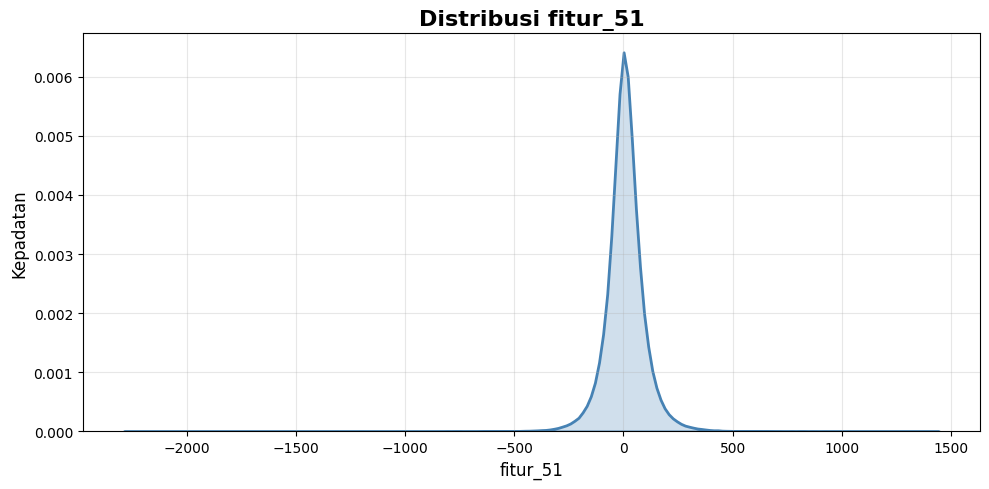

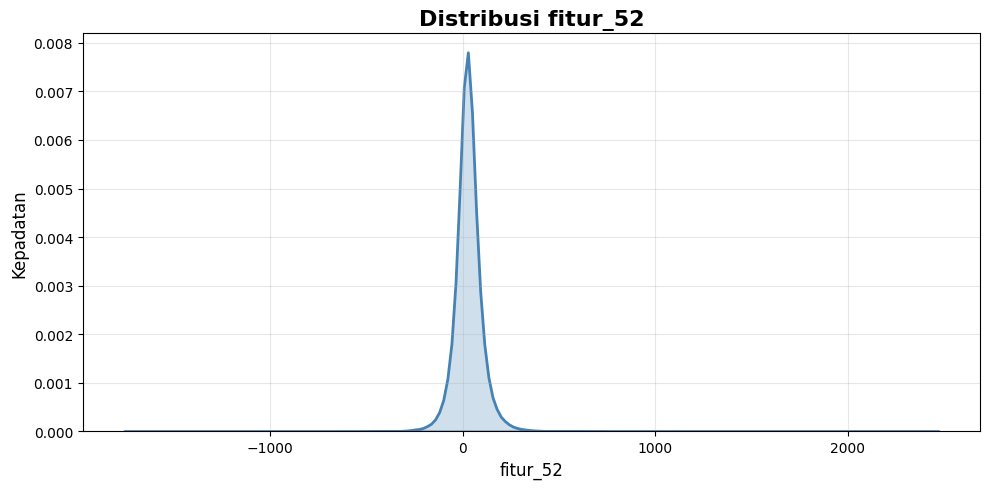

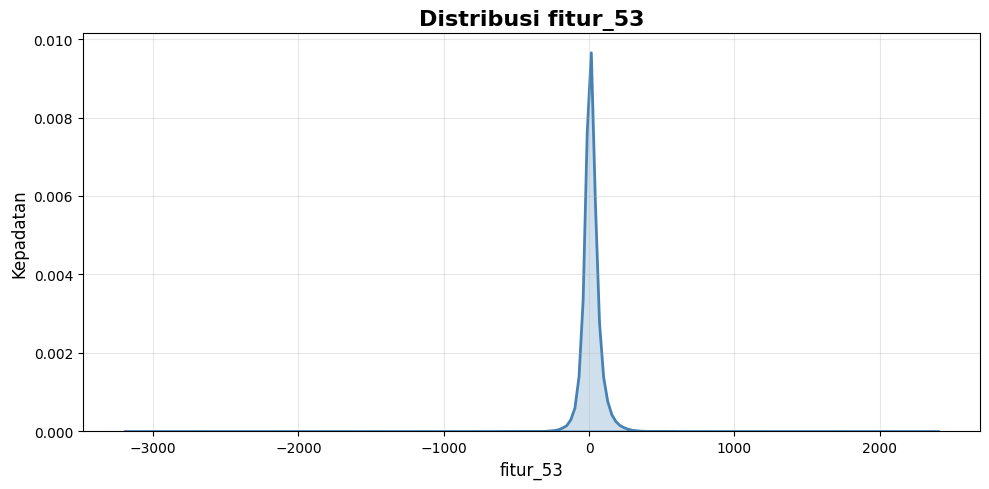

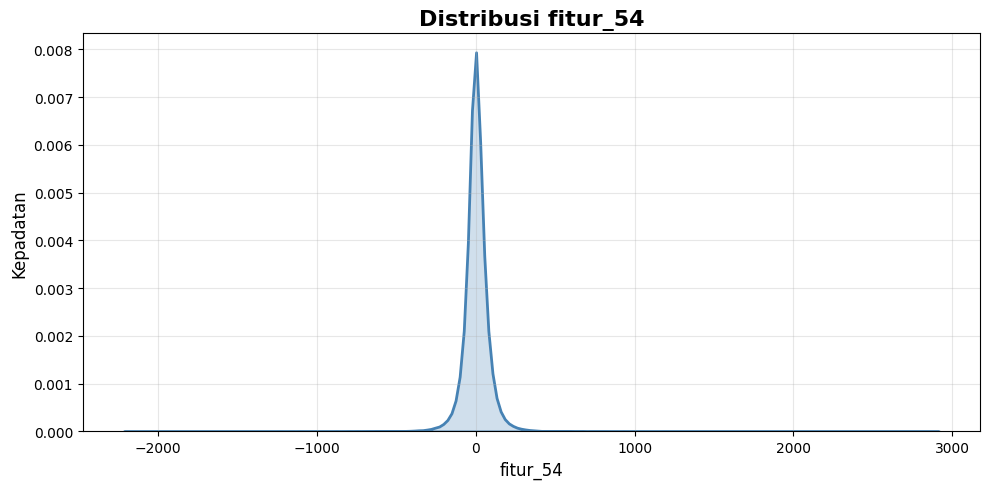

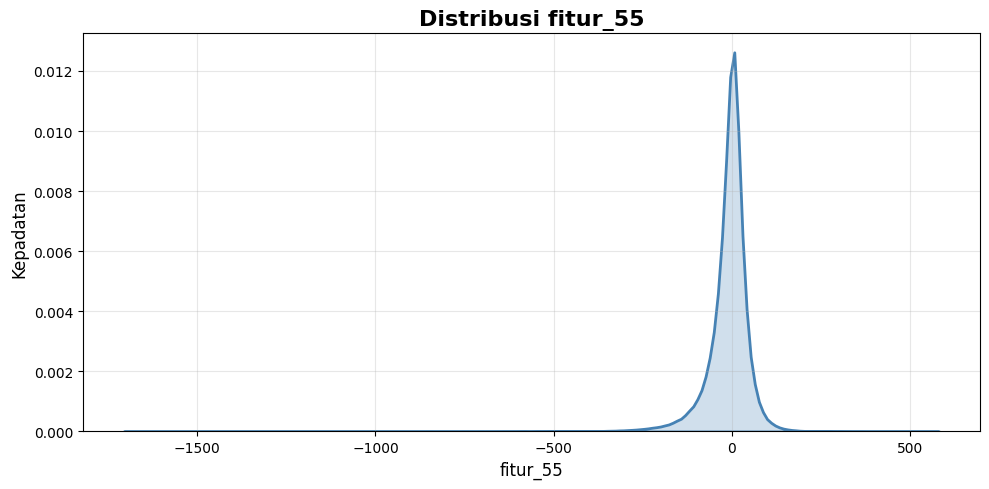

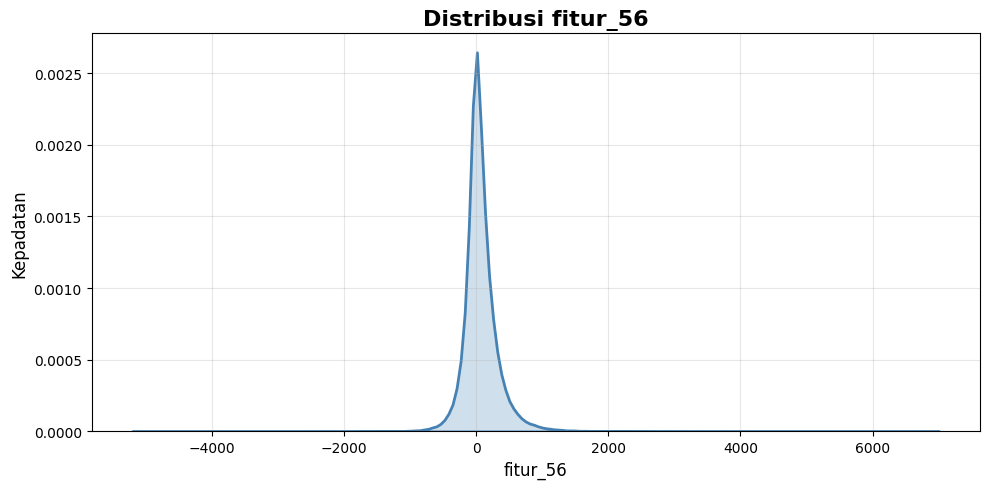

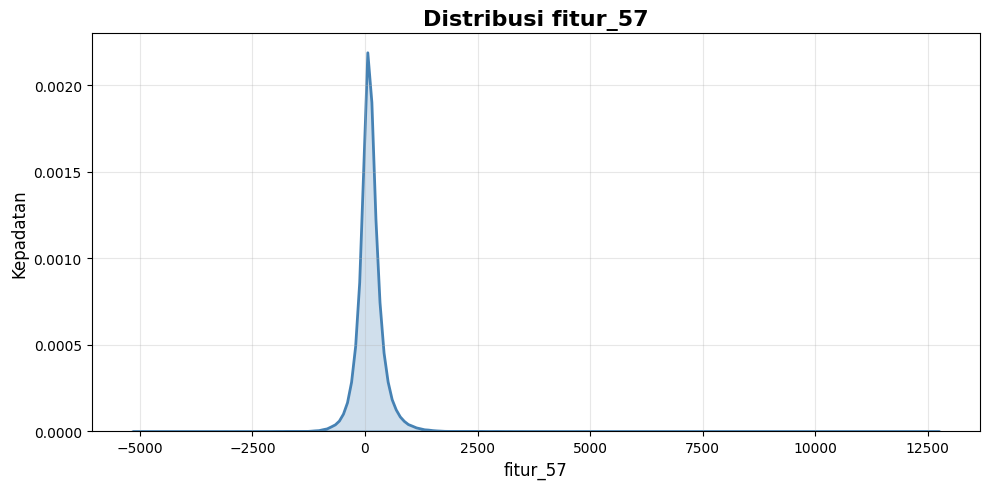

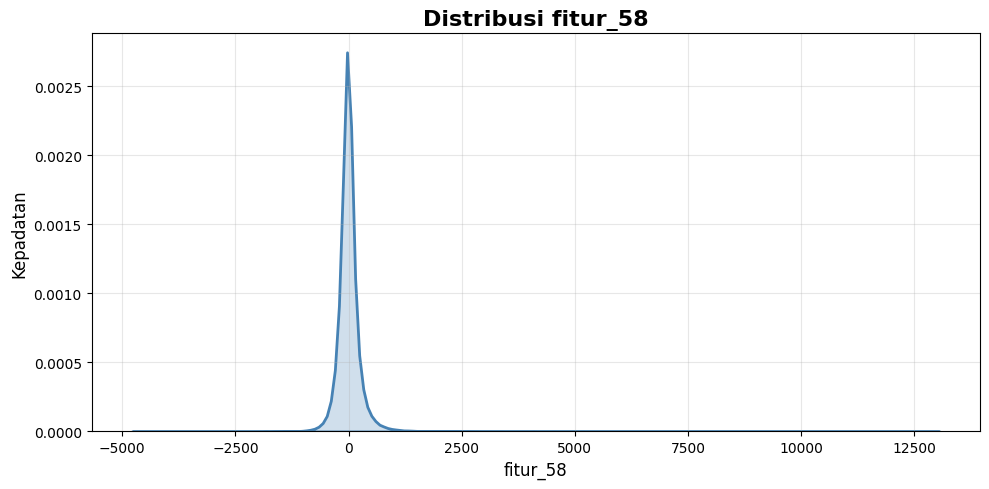

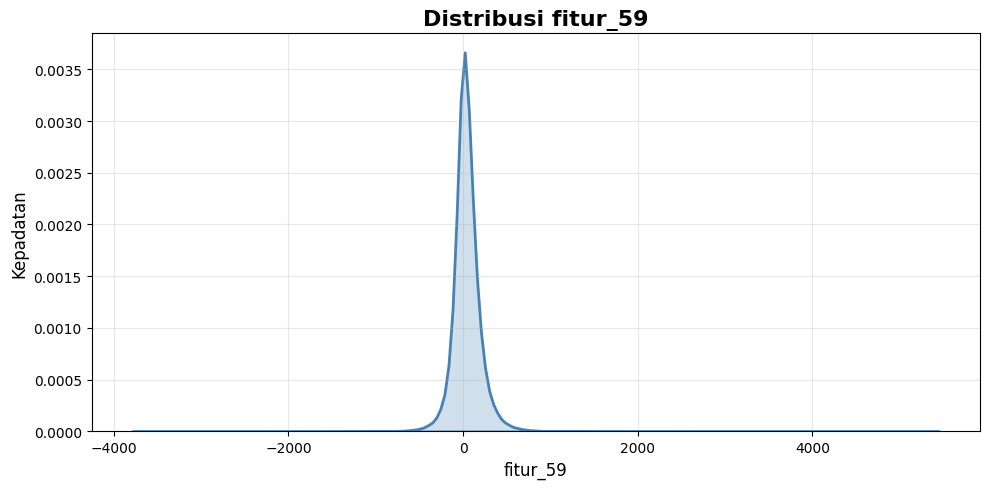

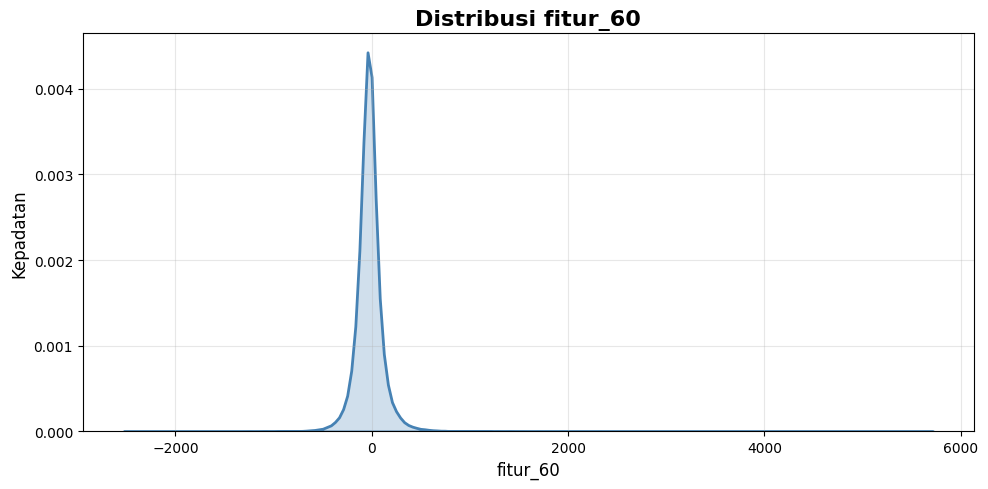

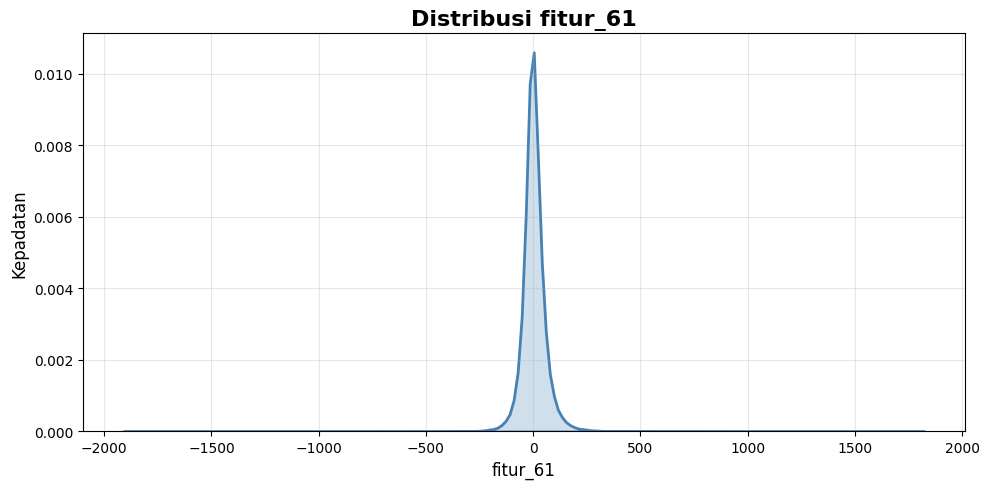

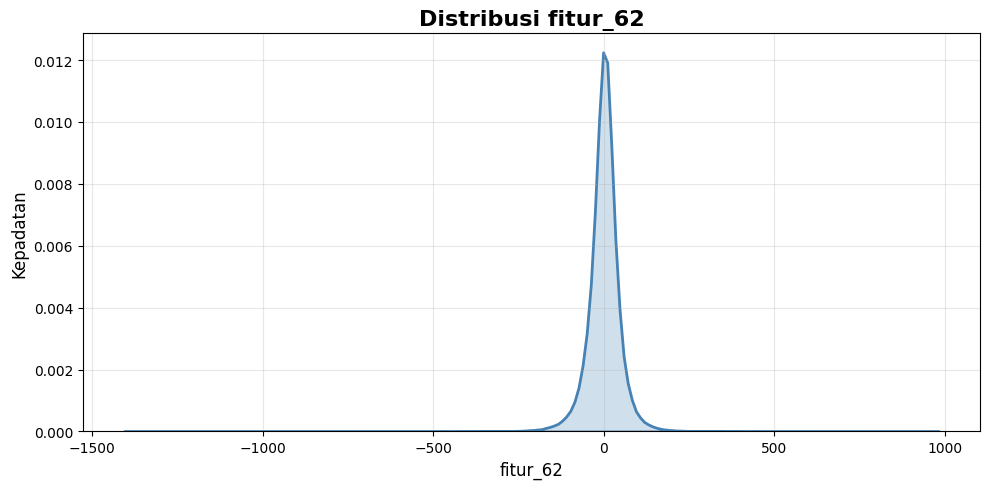

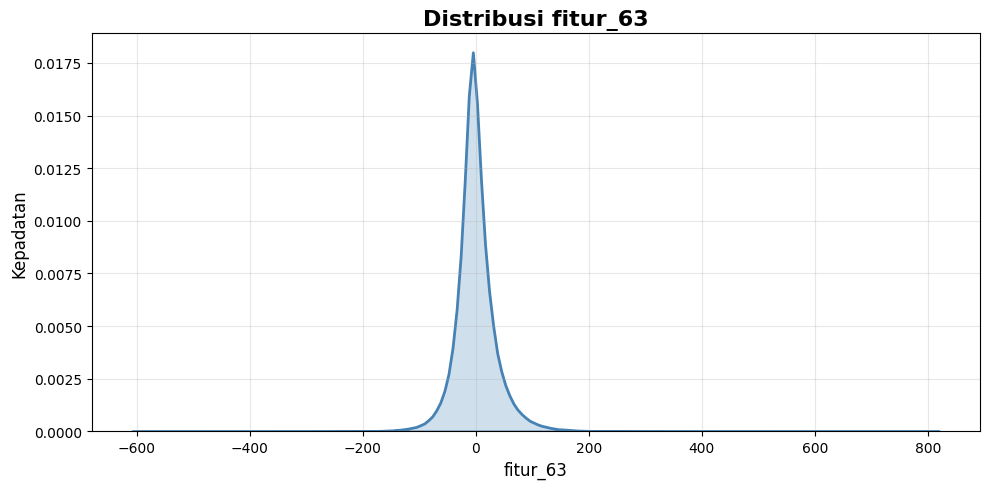

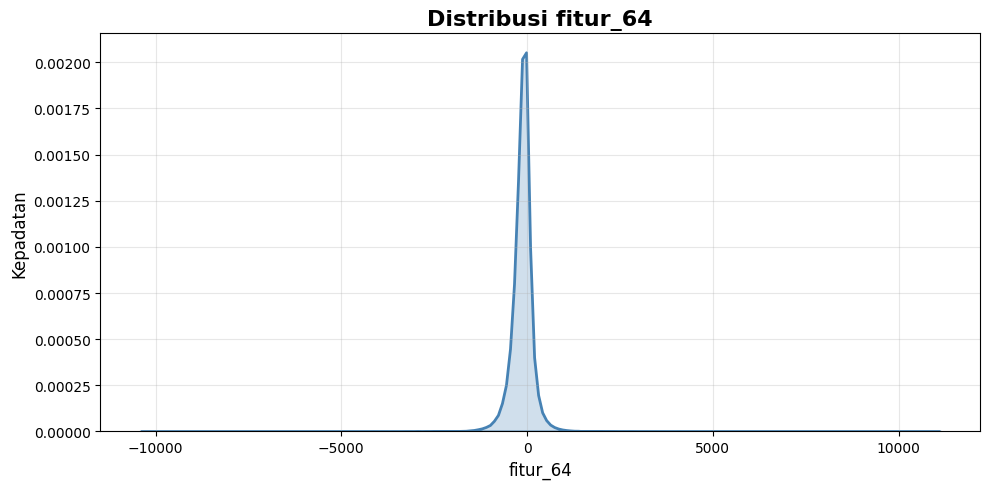

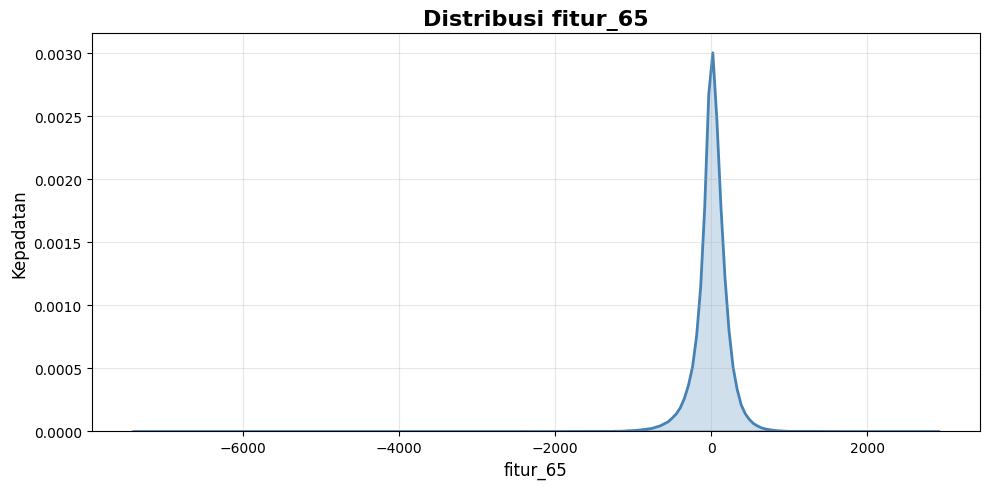

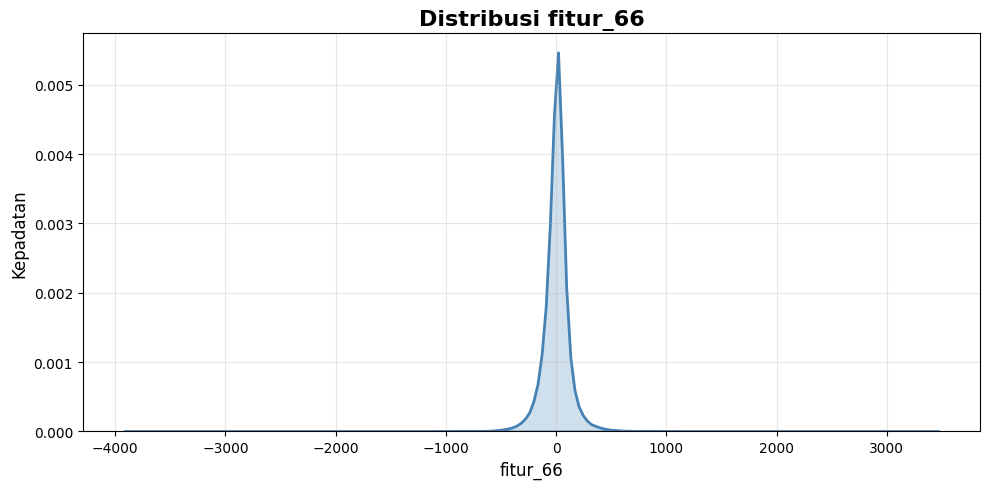

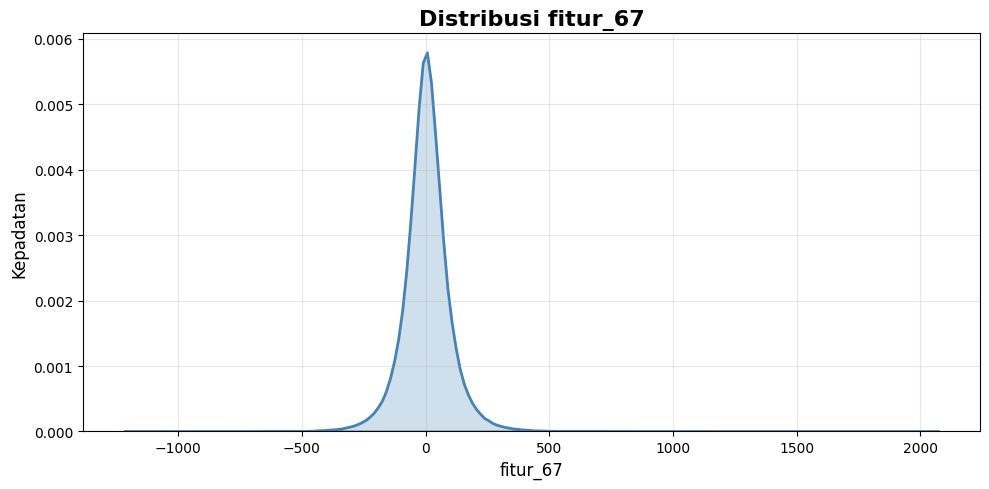

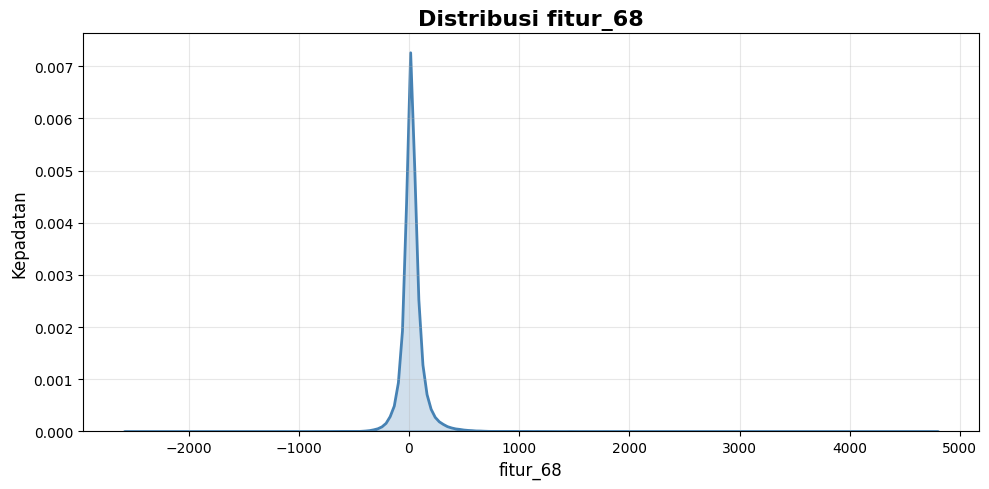

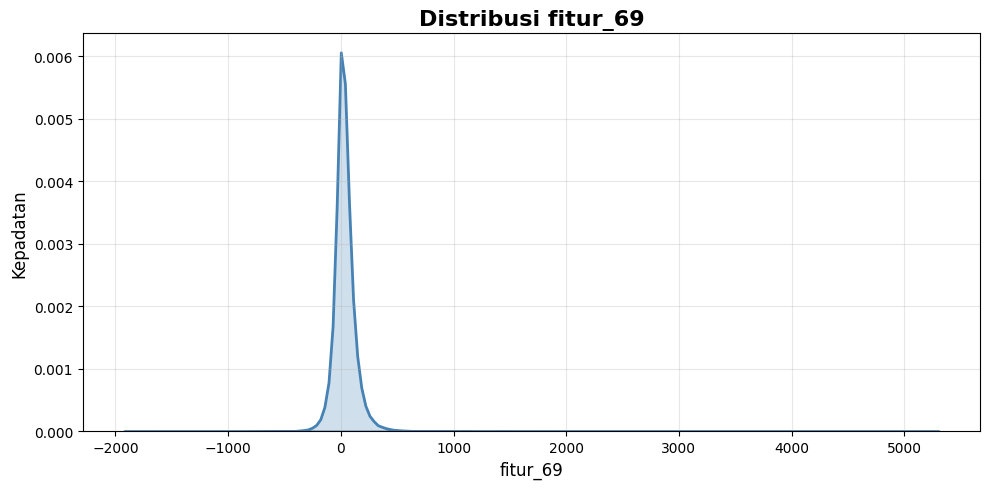

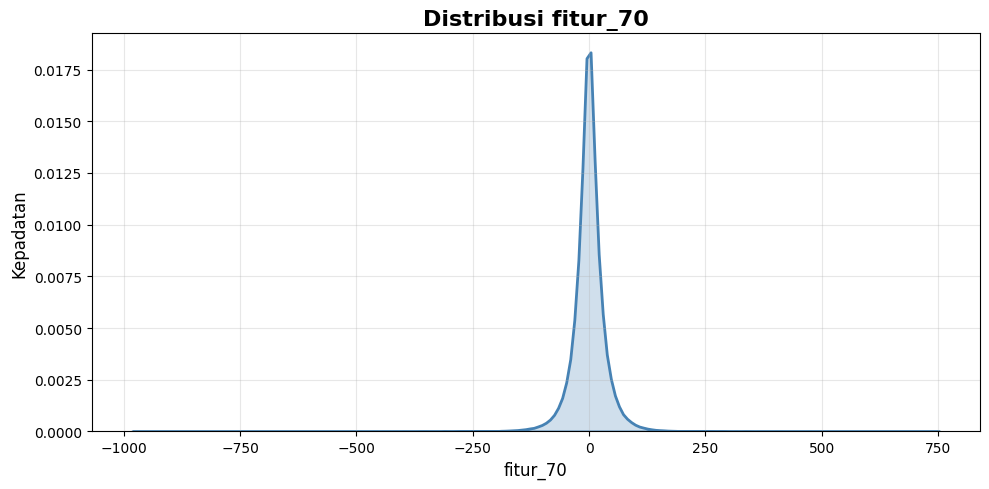

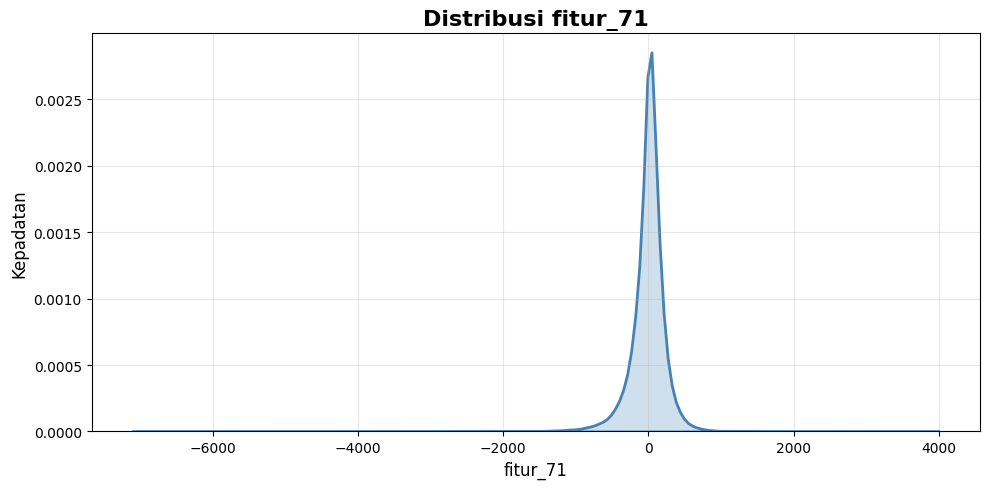

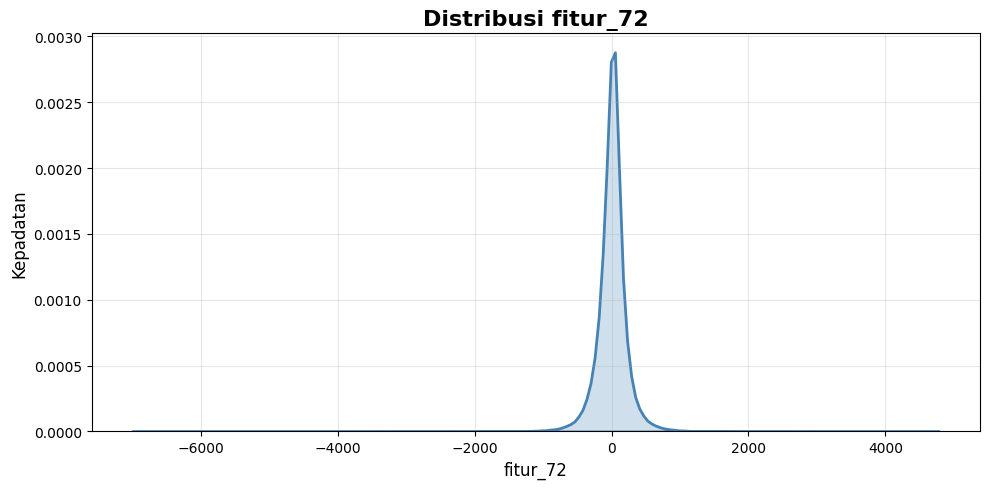

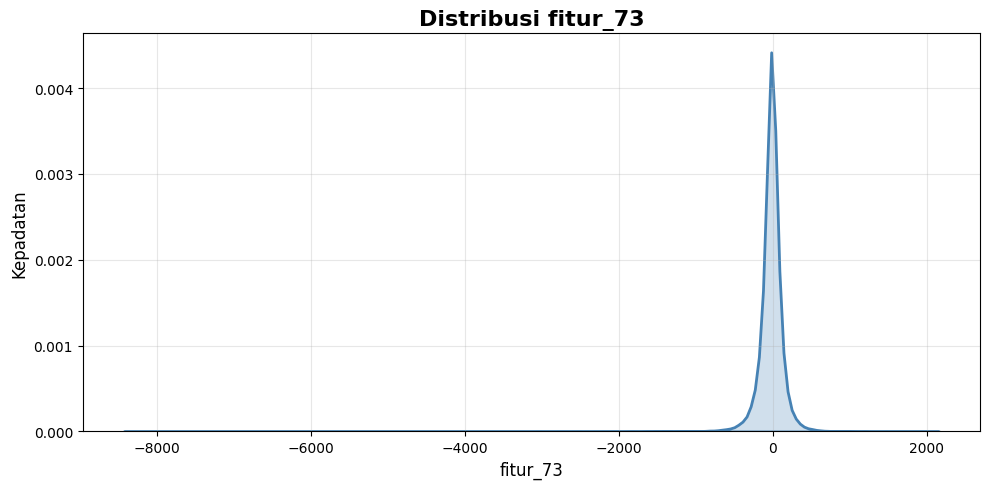

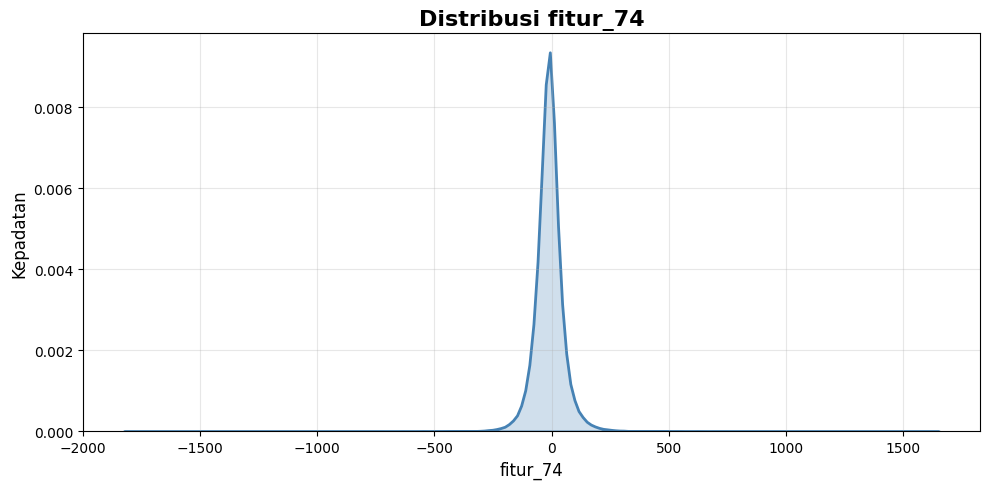

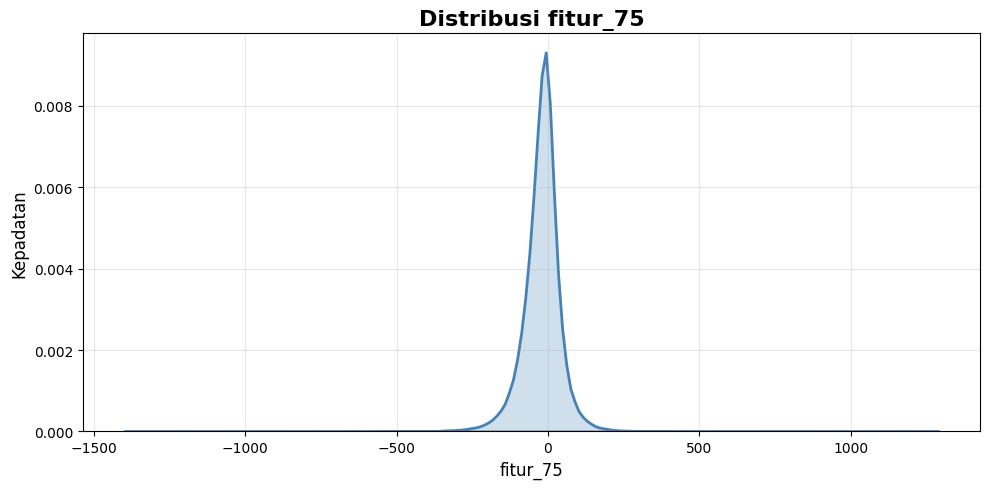

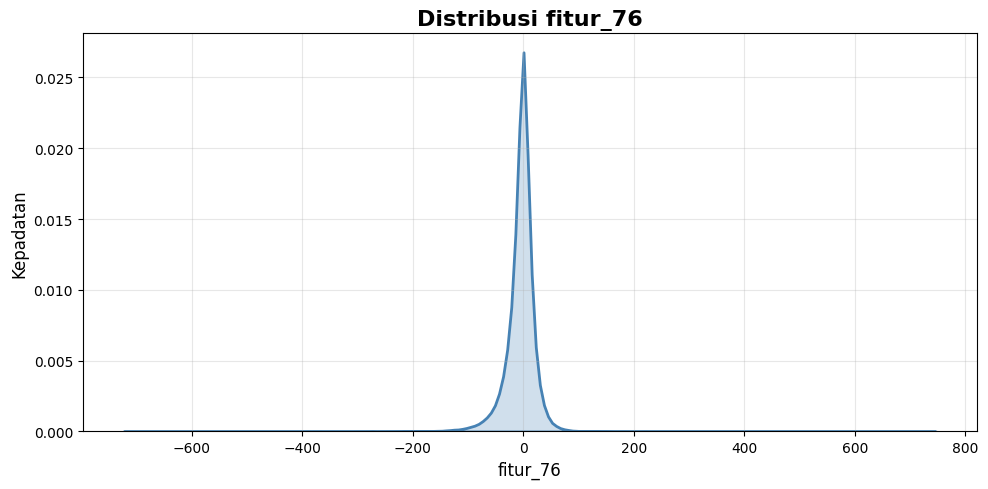

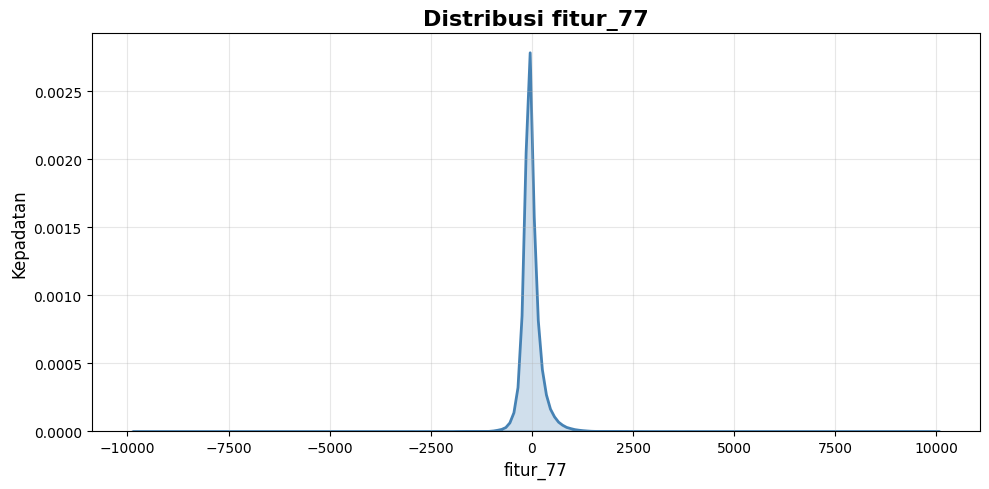

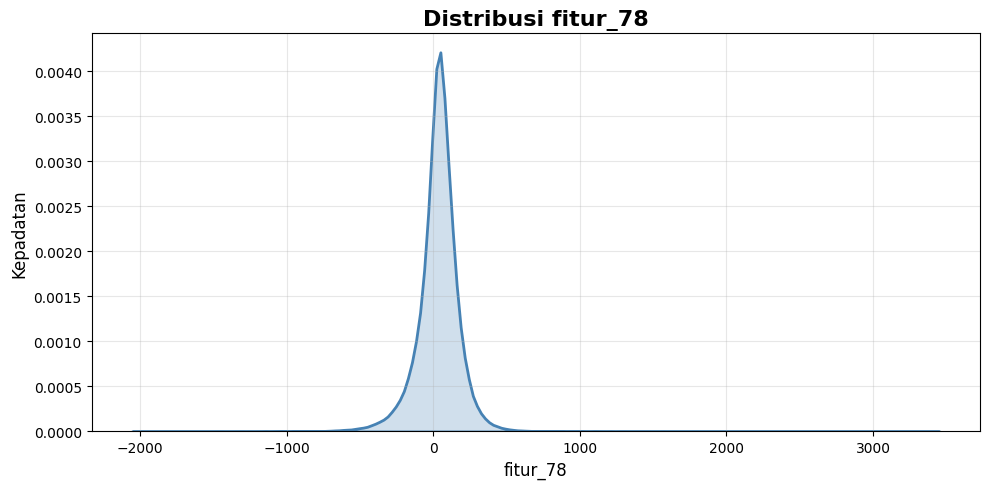

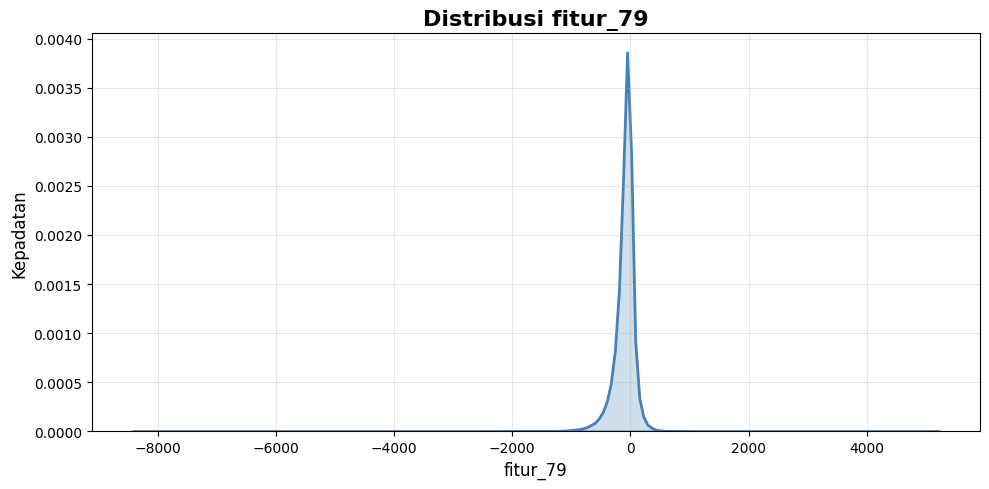

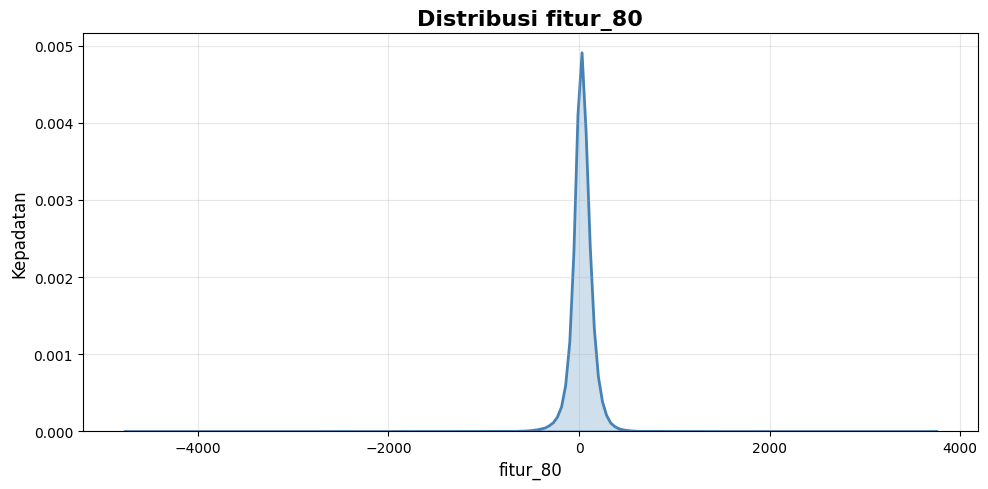

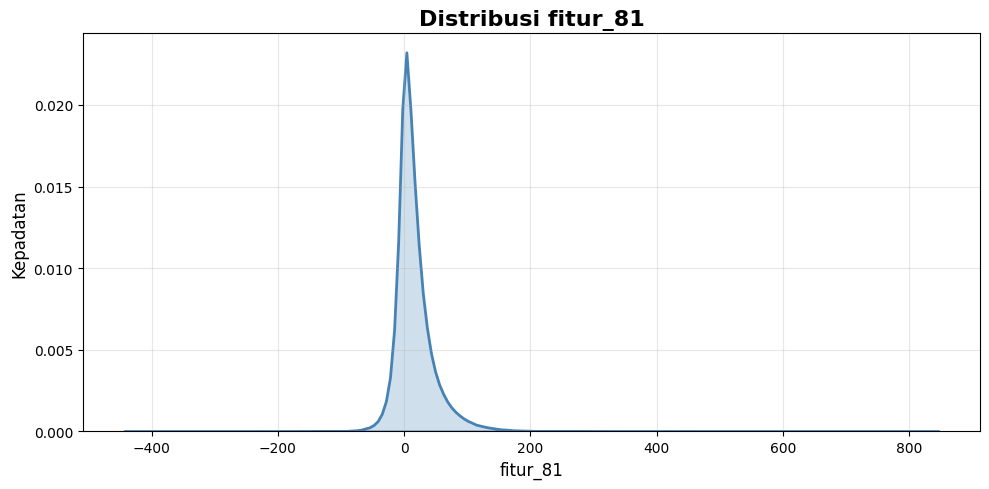

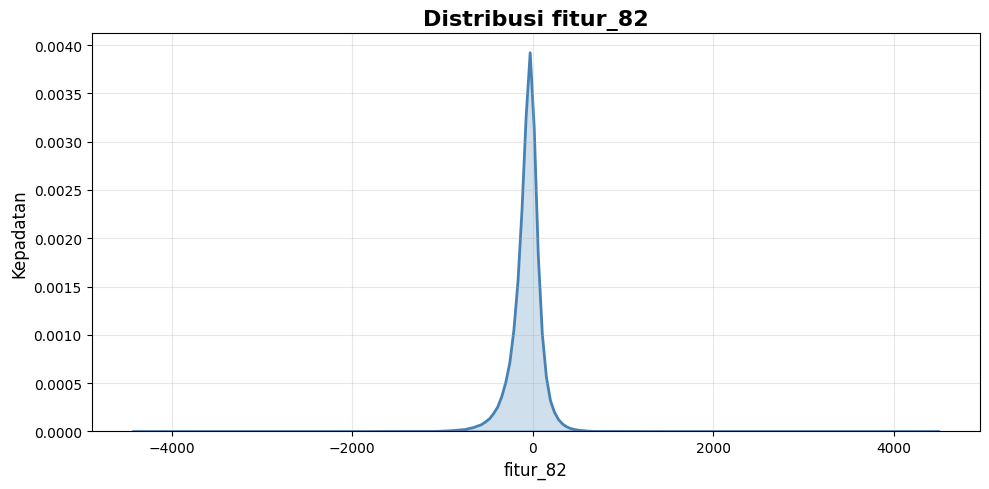

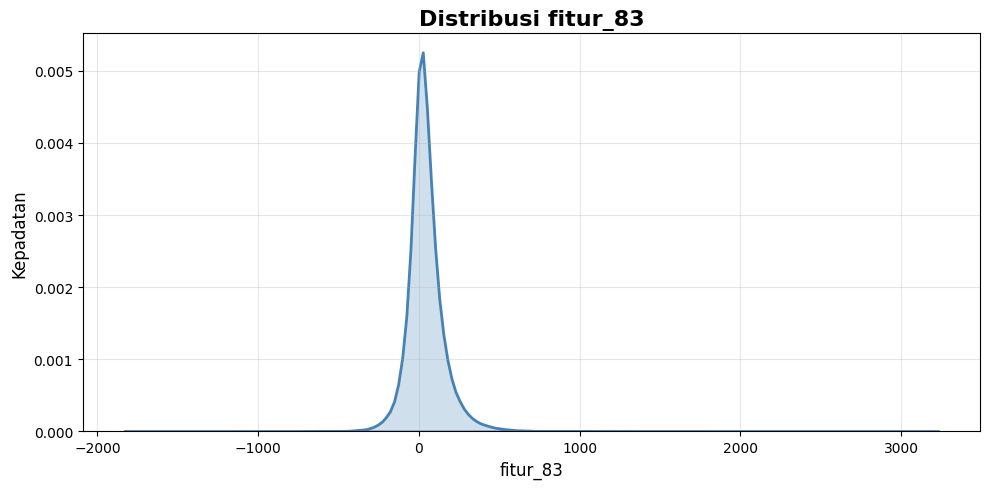

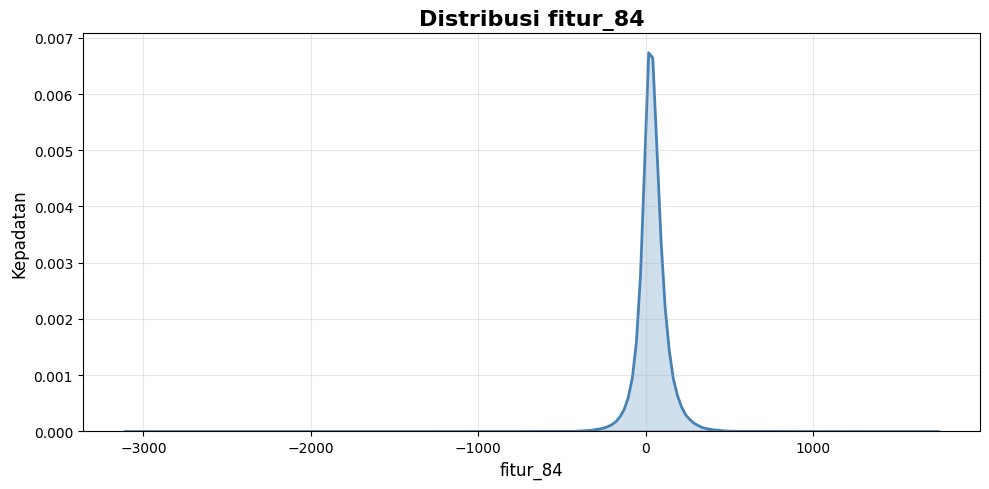

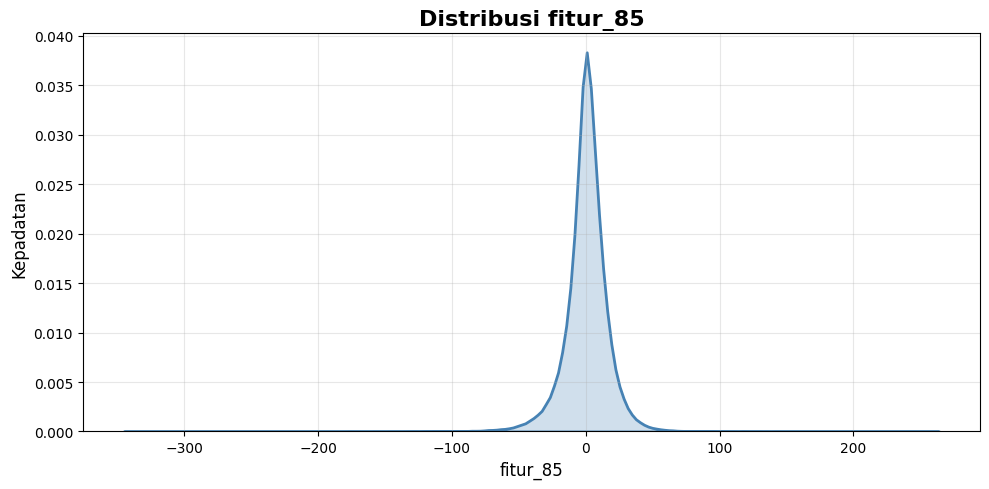

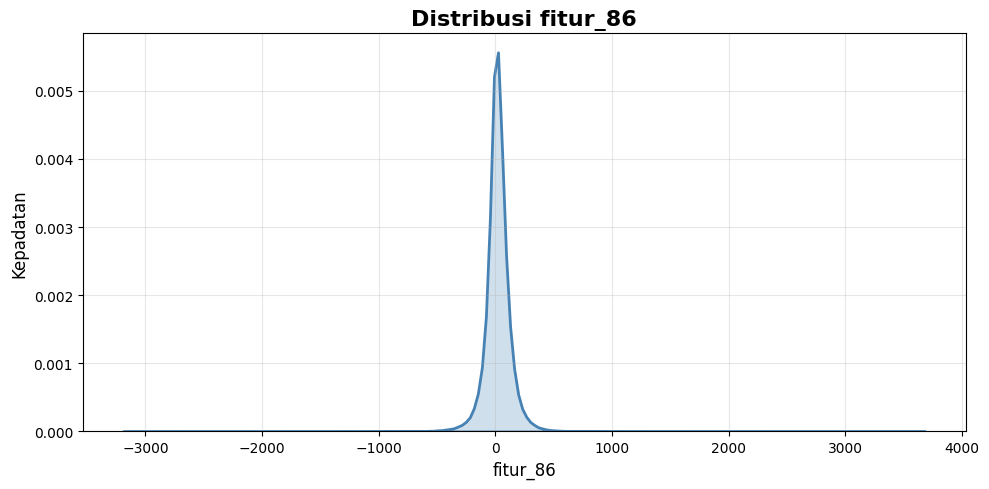

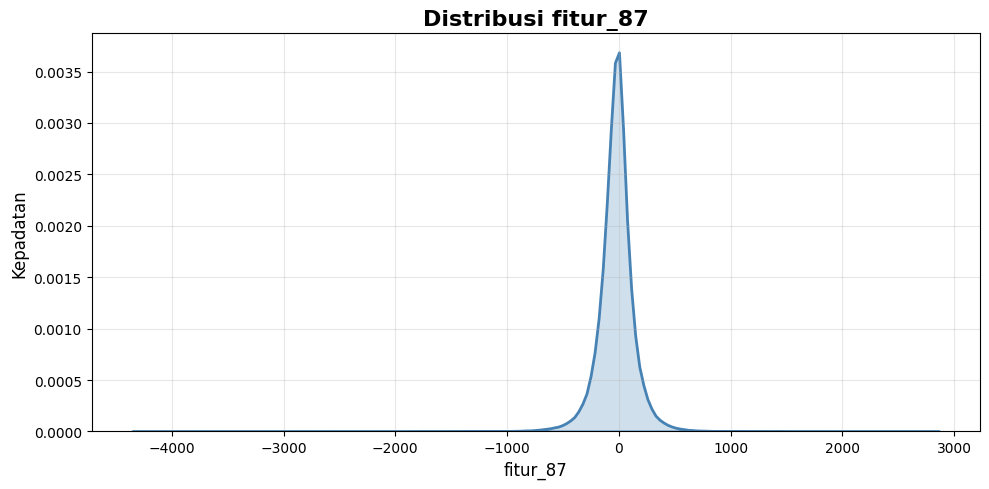

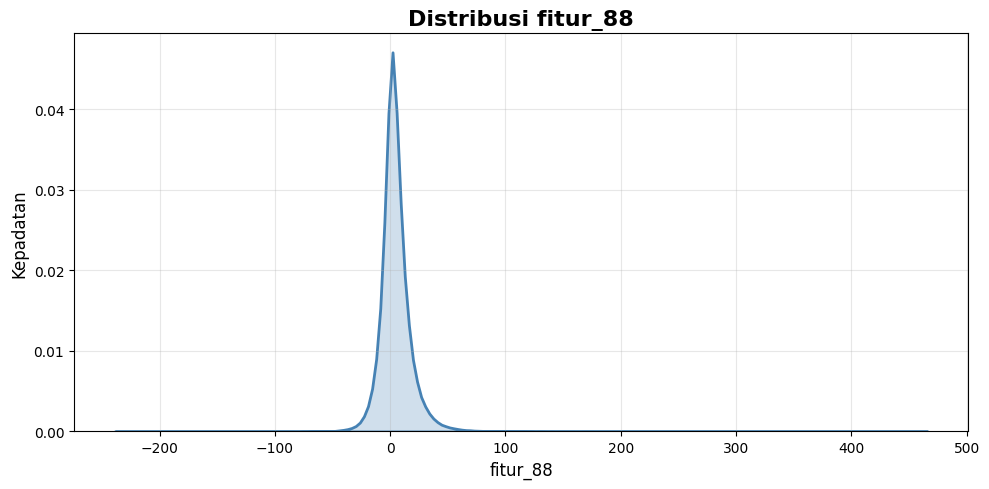

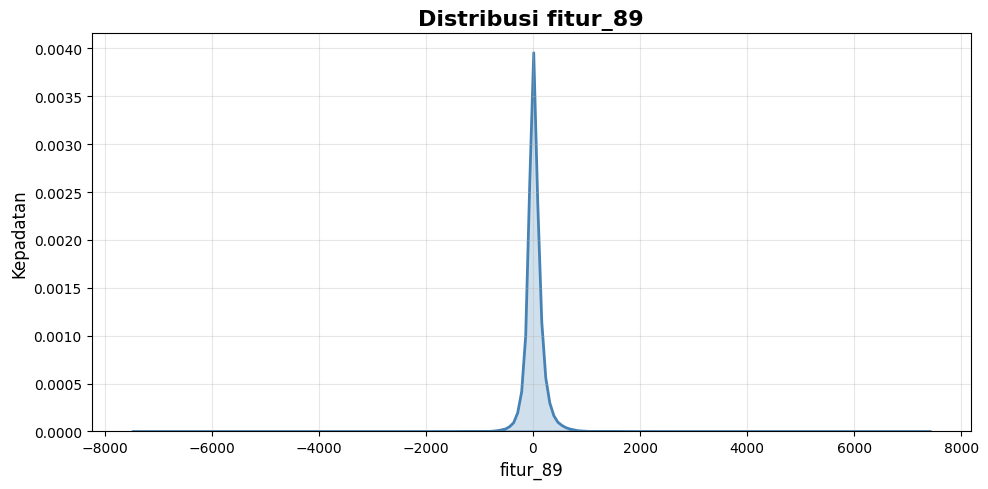

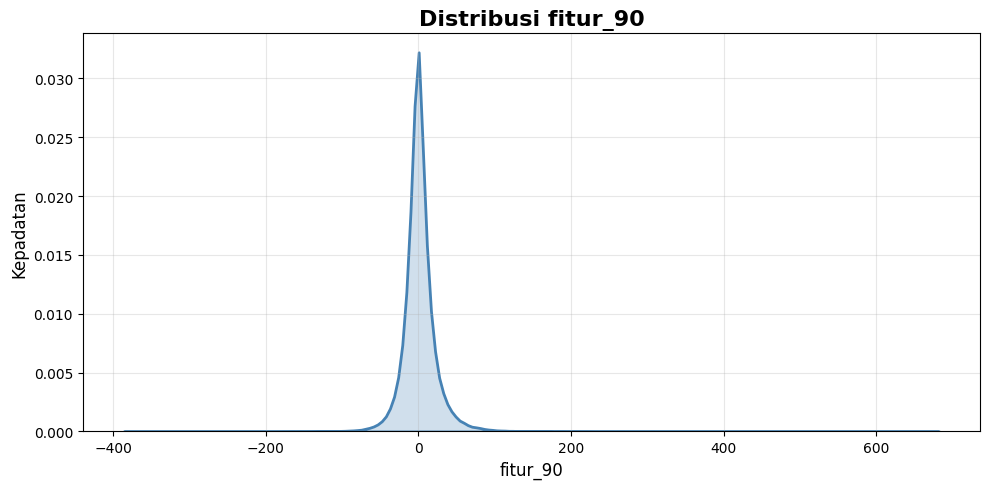

In [ ]:
for column in df.columns:
    plot_kde(column)

## Multivariate


<Axes: >

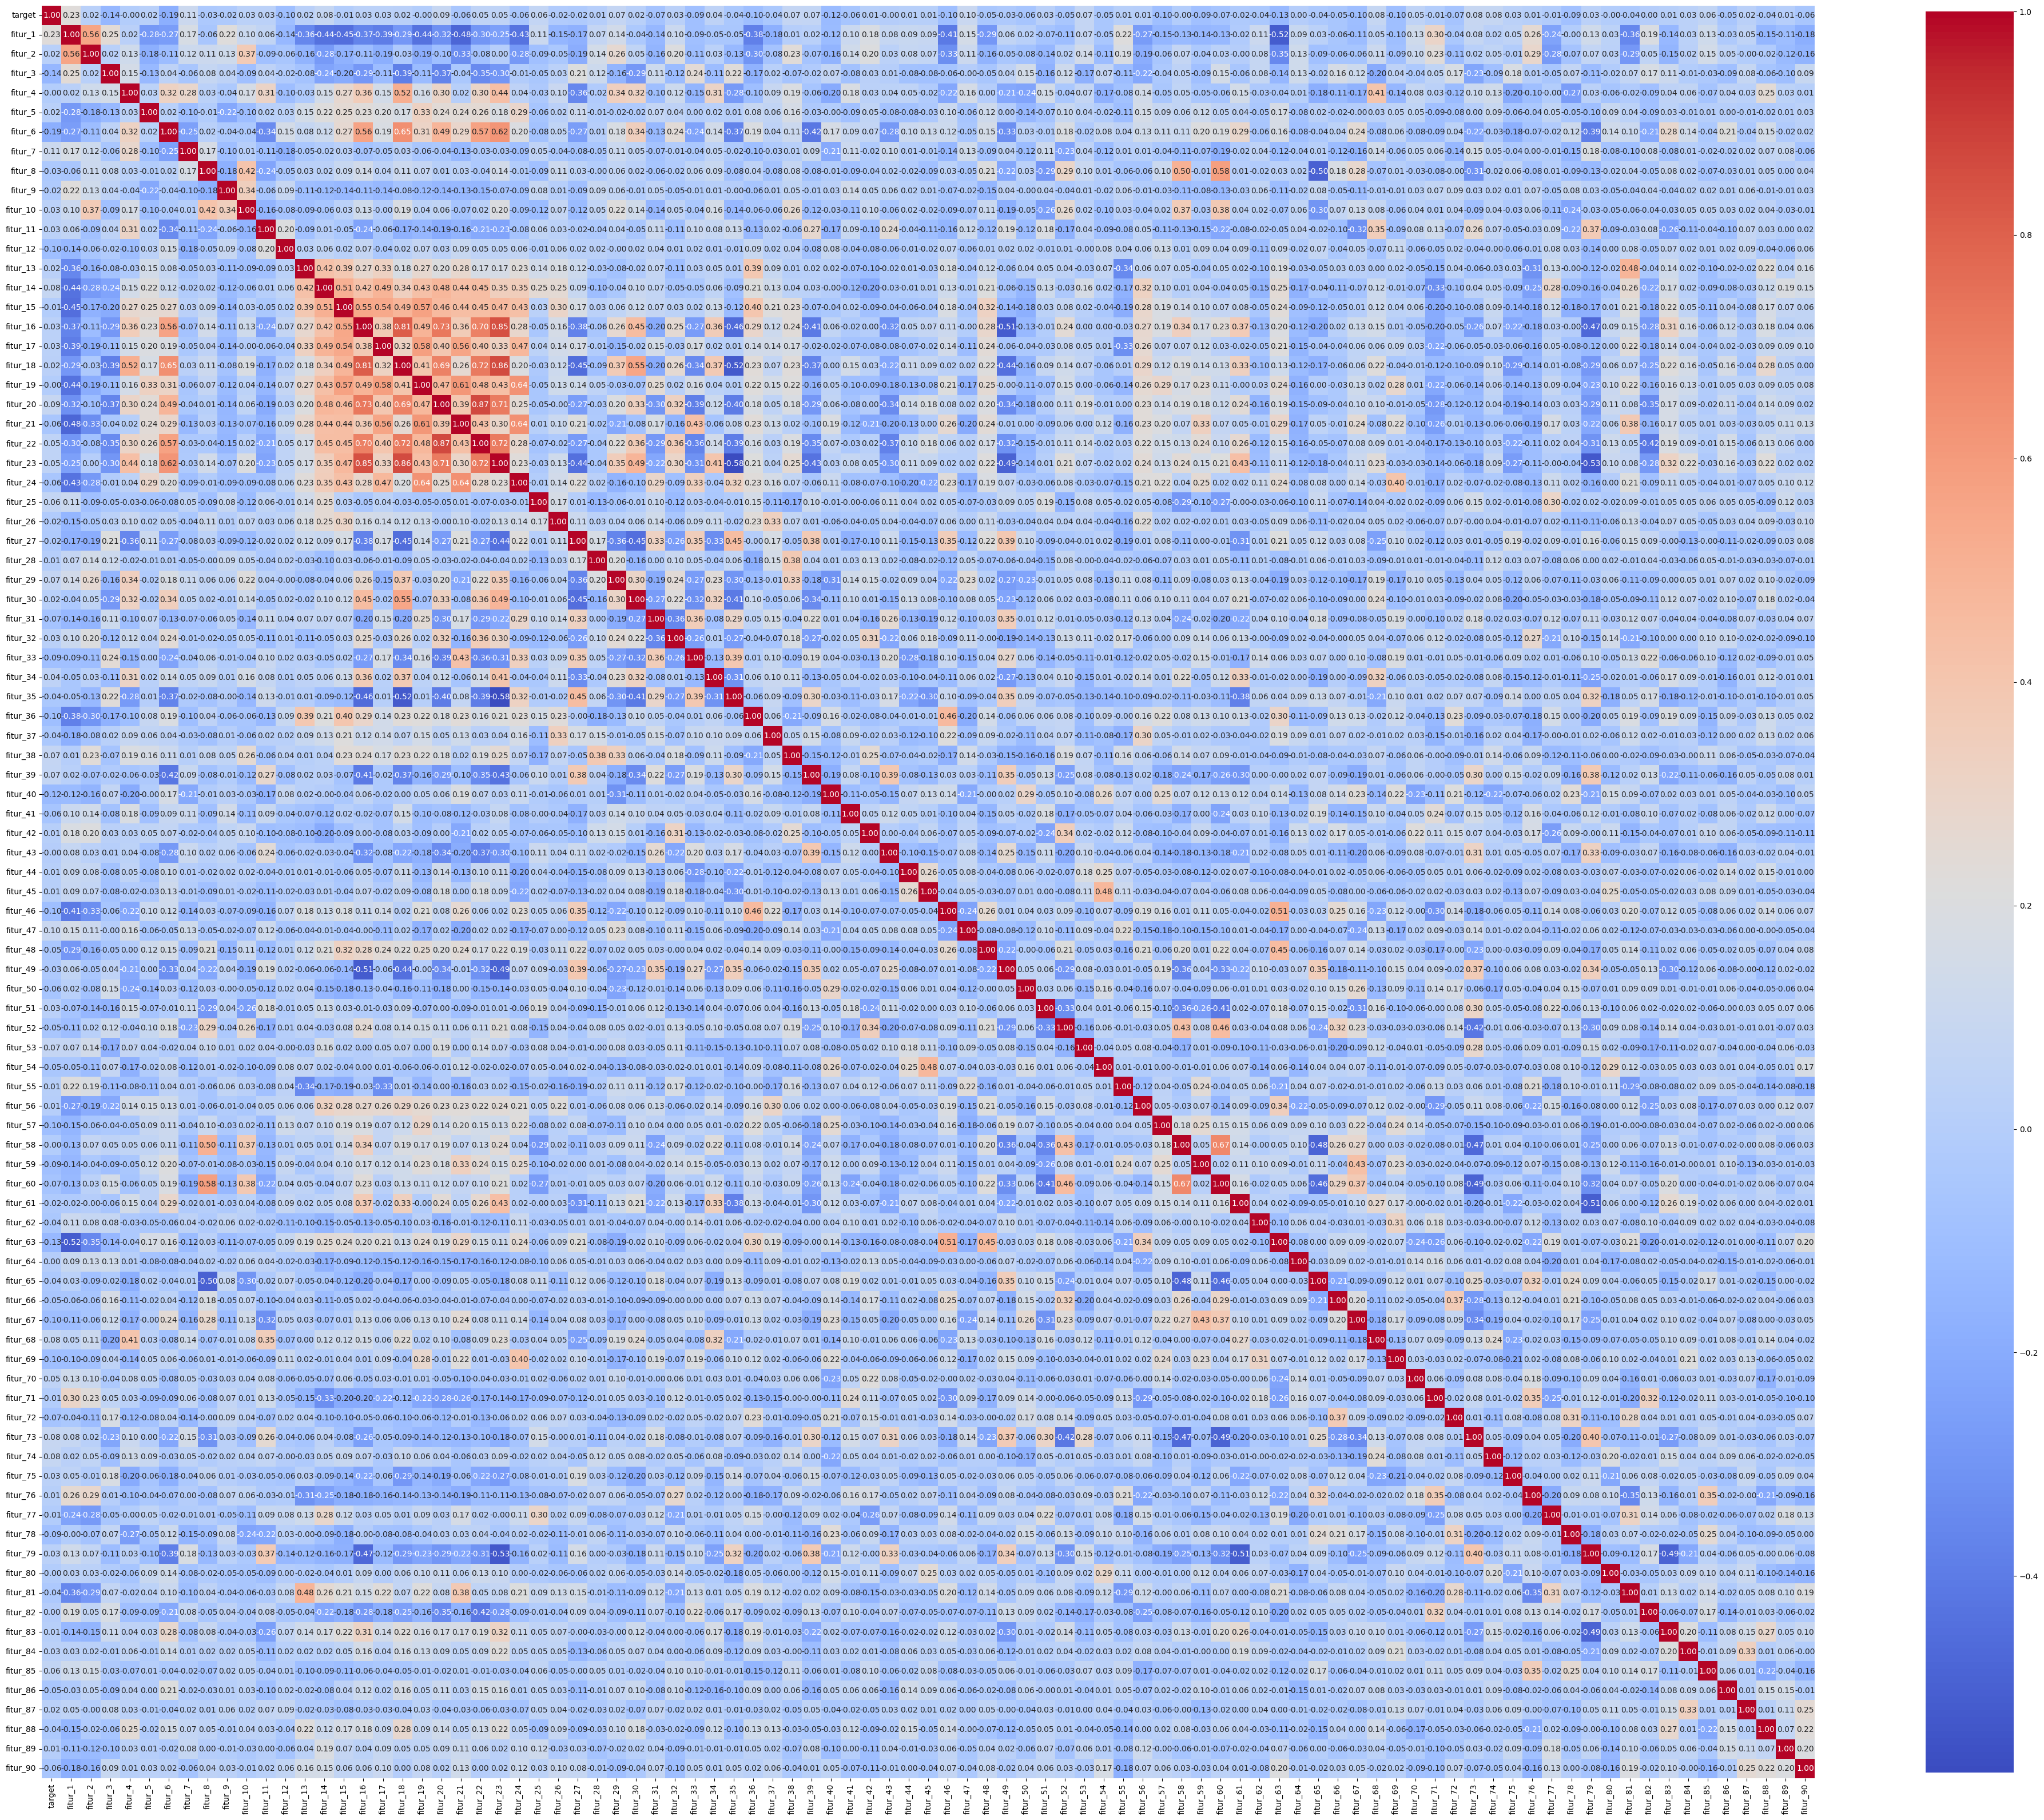

In [ ]:
df_corr = df.corr()
plt.figure(figsize=(50, 50))
sns.heatmap(
    df_corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.8},
)

# Preprocessing


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
corr_matrix = df.corr()
top_20_features = (
    corr_matrix["target"].abs().sort_values(ascending=False)[1:20].index.tolist()
)
print("20 fitur dengan korelasi tertinggi terhadap target:")
print(top_20_features)

df = df[top_20_features + ["target"]]

20 fitur dengan korelasi tertinggi terhadap target:
['fitur_1', 'fitur_6', 'fitur_3', 'fitur_63', 'fitur_40', 'fitur_7', 'fitur_67', 'fitur_46', 'fitur_36', 'fitur_69', 'fitur_12', 'fitur_57', 'fitur_47', 'fitur_59', 'fitur_33', 'fitur_78', 'fitur_20', 'fitur_73', 'fitur_74']


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


def remove_outliers(df, column):
    """
    Menghapus outlier dari kolom tertentu pada DataFrame menggunakan metode IQR.
    Args:
        df (pd.DataFrame): DataFrame input.
        column (str): Nama kolom yang akan dihapus outlier-nya.
    Returns:
        pd.DataFrame: DataFrame tanpa outlier pada kolom tersebut.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


removed_outliers_df = df.copy()
for column in df.columns:
    removed_outliers_df = remove_outliers(removed_outliers_df, column)

In [ ]:
scalery_target = StandardScaler()
removed_outliers_df["target"] = np.log1p(removed_outliers_df["target"])
removed_outliers_df["target"] = scalery_target.fit_transform(
    removed_outliers_df[["target"]]
)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = removed_outliers_df.drop("target", axis=1)
y = removed_outliers_df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeling


## LGBM


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Training LGBMRegressor
lgbm = LGBMRegressor(random_state=42, n_estimators=1000, learning_rate=0.01)
lgbm.fit(X_train, y_train)

# Predict
y_pred_lgbm = lgbm.predict(X_test)

# Evaluation
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print(f"LGBM RMSE: {rmse_lgbm:.2f}")
print(f"LGBM R2 Score: {r2_lgbm:.2f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005810 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 182993, number of used features: 19
[LightGBM] [Info] Start training from score 0.000271
LGBM RMSE: 0.85
LGBM R2 Score: 0.27
LGBM RMSE: 0.85
LGBM R2 Score: 0.27


## MLP


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import mean_squared_error, r2_score
import os

os.environ["PYTHONHASHSEED"] = "42"

# Konversi data ke tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = (
    torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1).to(device)
)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1).to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

g = torch.Generator()
g.manual_seed(42)

train_loader = DataLoader(
    train_dataset,
    batch_size=256,
    shuffle=True,
    num_workers=0,
    worker_init_fn=lambda worker_id: np.random.seed(42 + worker_id),
    generator=g,
)
test_loader = DataLoader(
    test_dataset,
    batch_size=256,
    shuffle=False,
    num_workers=0,
    generator=g,
)

In [ ]:
class MLPRegressor(nn.Module):
    def __init__(self, input_dim, dropout_p=0.3):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.dropout1 = nn.Dropout(dropout_p)
        self.fc2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32)
        self.dropout2 = nn.Dropout(dropout_p)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLPRegressor(X_train.shape[1], dropout_p=0.3).to(device)

# Loss dan optimizer
criterion = nn.L1Loss()
weight_decay = 1e-3  # L2 regularization
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=weight_decay)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2)

# Early stopping
best_val_loss = float("inf")
patience = 15
counter = 0
best_model_state = None

l1_lambda = 1e-4  # L1 regularization

# Tambahkan list untuk menyimpan loss dan metric tiap epoch
train_losses, val_losses = [], []
train_rmses, val_rmses = [], []
train_r2s, val_r2s = [], []

In [ ]:
for epoch in range(50):
    model.train()
    train_loss = 0
    y_true_train = []
    y_pred_train = []
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        # L1 regularization manual
        l1_norm = sum(p.abs().sum() for p in model.parameters())
        loss = loss + l1_lambda * l1_norm
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * xb.size(0)
        y_true_train.append(yb.cpu().numpy())
        y_pred_train.append(pred.cpu().detach().numpy())
    train_loss /= len(train_loader.dataset)
    y_true_train = np.concatenate(y_true_train).flatten()
    y_pred_train = np.concatenate(y_pred_train).flatten()
    train_mse = mean_squared_error(y_true_train, y_pred_train)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_true_train, y_pred_train)

    # Validation
    model.eval()
    val_loss = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for xb, yb in test_loader:
            xb, yb = xb.to(device), yb.to(device)
            pred = model(xb)
            loss = criterion(pred, yb)
            l1_norm = sum(p.abs().sum() for p in model.parameters())
            loss = loss + l1_lambda * l1_norm
            val_loss += loss.item() * xb.size(0)
            y_true.append(yb.cpu().numpy())
            y_pred.append(pred.cpu().numpy())
    val_loss /= len(test_loader.dataset)
    y_true = np.concatenate(y_true).flatten()
    y_pred = np.concatenate(y_pred).flatten()
    val_mse = mean_squared_error(y_true, y_pred)
    val_rmse = np.sqrt(val_mse)
    val_r2 = r2_score(y_true, y_pred)

    # Simpan loss dan metric tiap epoch
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_rmses.append(train_rmse)
    val_rmses.append(val_rmse)
    train_r2s.append(train_r2)
    val_r2s.append(val_r2)

    print(
        f"Epoch {epoch+1}: "
        f"Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}, "
        f"Train MSE={train_mse:.4f}, Val MSE={val_mse:.4f}, "
        f"Train RMSE={train_rmse:.4f}, Val RMSE={val_rmse:.4f}, "
        f"Train R2={train_r2:.4f}, Val R2={val_r2:.4f}"
    )

    scheduler.step(epoch + 1)

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model.state_dict()
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered.")
            break

# Load best model
if best_model_state is not None:
    model.load_state_dict(best_model_state)

# Evaluasi
model.eval()
with torch.no_grad():
    y_pred_mlp = model(X_test_tensor).cpu().numpy().flatten()
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"MLP RMSE: {rmse_mlp:.2f}")
print(f"MLP R2 Score: {r2_mlp:.2f}")

Epoch 1: Train Loss=0.8149, Val Loss=0.7418, Train MSE=1.0252, Val MSE=0.8757, Train RMSE=1.0125, Val RMSE=0.9358, Train R2=-0.0234, Val R2=0.1182
Epoch 2: Train Loss=0.7598, Val Loss=0.7167, Train MSE=0.9117, Val MSE=0.8243, Train RMSE=0.9548, Val RMSE=0.9079, Train R2=0.0899, Val R2=0.1699
Epoch 2: Train Loss=0.7598, Val Loss=0.7167, Train MSE=0.9117, Val MSE=0.8243, Train RMSE=0.9548, Val RMSE=0.9079, Train R2=0.0899, Val R2=0.1699
Epoch 3: Train Loss=0.7394, Val Loss=0.7054, Train MSE=0.8691, Val MSE=0.8038, Train RMSE=0.9322, Val RMSE=0.8966, Train R2=0.1325, Val R2=0.1906
Epoch 3: Train Loss=0.7394, Val Loss=0.7054, Train MSE=0.8691, Val MSE=0.8038, Train RMSE=0.9322, Val RMSE=0.8966, Train R2=0.1325, Val R2=0.1906
Epoch 4: Train Loss=0.7273, Val Loss=0.6992, Train MSE=0.8470, Val MSE=0.7918, Train RMSE=0.9203, Val RMSE=0.8898, Train R2=0.1545, Val R2=0.2026
Epoch 4: Train Loss=0.7273, Val Loss=0.6992, Train MSE=0.8470, Val MSE=0.7918, Train RMSE=0.9203, Val RMSE=0.8898, Train R2

# Eval


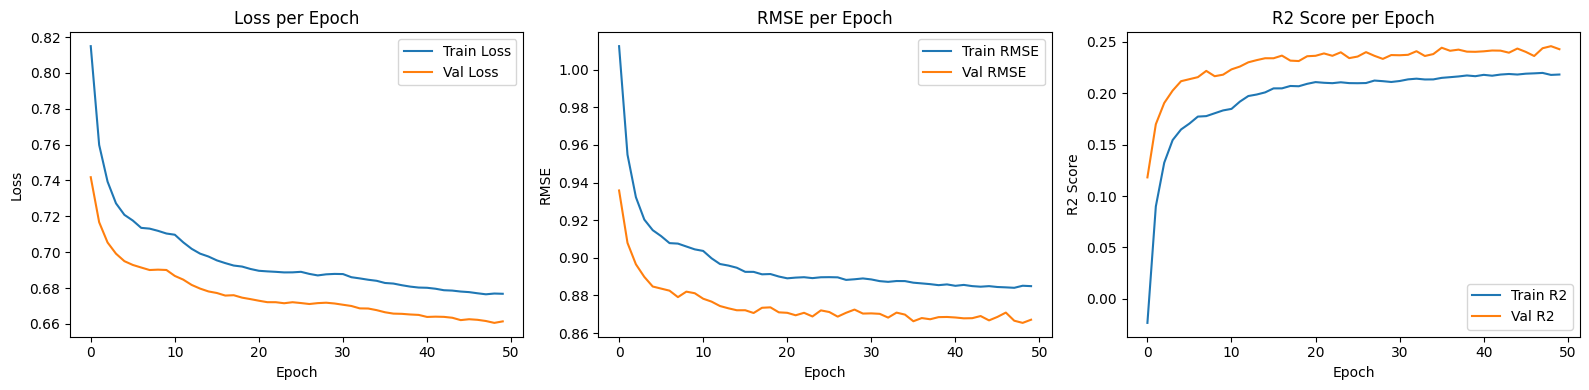

In [ ]:
# Plot loss dan metric tiap epoch
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss per Epoch")
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(train_rmses, label="Train RMSE")
plt.plot(val_rmses, label="Val RMSE")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("RMSE per Epoch")
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(train_r2s, label="Train R2")
plt.plot(val_r2s, label="Val R2")
plt.xlabel("Epoch")
plt.ylabel("R2 Score")
plt.title("R2 Score per Epoch")
plt.legend()

plt.tight_layout()
plt.show()

# Test model


In [ ]:
def predict_sample(num, X_test, y_test, model, device, scalery_target):
    sample = X_test[num].reshape(1, -1)
    sample_tensor = torch.tensor(sample, dtype=torch.float32).to(device)

    model.eval()
    with torch.no_grad():
        pred_sample_scaled = model(sample_tensor).cpu().numpy().flatten()[0]

    # Inverse StandardScaler untuk target (bukan fitur)
    pred_sample_log = scalery_target.inverse_transform([[pred_sample_scaled]])[0][0]
    # Inverse log1p
    pred_sample = np.expm1(pred_sample_log)
    pred_sample_int = int(round(pred_sample))

    # Ambil target sebenarnya (dalam bentuk terstandardisasi dan log1p)
    true_sample_scaled = y_test.iloc[num]
    true_sample_log = scalery_target.inverse_transform([[true_sample_scaled]])[0][0]
    true_sample = np.expm1(true_sample_log)
    true_sample_int = int(round(true_sample))

    print(f"Prediksi target untuk X_test[{num}]: {pred_sample_int}")
    print(f"Target sebenarnya: {true_sample_int}")
    return pred_sample_int, true_sample_int


predict_sample(1, X_test, y_test, model, device, scalery_target)

Prediksi target untuk X_test[1]: 2005
Target sebenarnya: 2007


(2005, 2007)

# Kesimpulan

Berdasarkan berbagai percobaan dan teknik preprocessing yang telah dilakukan, dua model machine learning utama yang diuji adalah LGBMRegressor dan MLP (Multi-Layer Perceptron). Hasil evaluasi menunjukkan bahwa model terbaik adalah LGBM dengan performa sebagai berikut:

- **LGBM RMSE:** 0.85
- **LGBM R2 Score:** 0.27

Sedangkan model MLP memberikan hasil:

- **MLP RMSE:** 0.87
- **MLP R2 Score:** 0.24

Dengan demikian, model LGBM lebih unggul dibandingkan MLP pada data ini, meskipun perbedaannya tidak terlalu besar. Nilai R2 yang masih rendah menunjukkan bahwa prediksi masih dapat ditingkatkan, baik dari sisi feature engineering, tuning hyperparameter, maupun eksplorasi model lain.

**Analisis dan Alasan LGBM Lebih Unggul:**  
LGBM (LightGBM) adalah algoritma gradient boosting decision tree yang dirancang untuk efisiensi dan performa tinggi pada data tabular. Secara teoretis, model berbasis pohon keputusan seperti LGBM sangat efektif dalam menangani data dengan banyak fitur, relasi non-linear, serta robust terhadap outlier dan distribusi fitur yang tidak normal (skewed). LGBM juga melakukan feature selection secara otomatis melalui proses pemangkasan pohon (tree pruning) dan pembobotan fitur berdasarkan gain, sehingga mampu mengurangi dampak fitur yang tidak relevan atau noisy.

Sebaliknya, MLP (Multi-Layer Perceptron) merupakan model neural network yang sangat powerful untuk data dengan struktur kompleks dan jumlah data besar. Namun, pada data tabular dengan banyak outlier dan distribusi yang skewed, MLP cenderung kurang stabil dan membutuhkan proses normalisasi serta tuning arsitektur yang lebih mendalam. MLP juga sangat sensitif terhadap kualitas data dan sering kali overfitting jika data tidak cukup representatif atau mengandung banyak noise.

**Catatan tentang Kualitas Data:**  
Kualitas data pada kasus ini dapat dikategorikan rendah, ditandai dengan banyaknya outlier dan distribusi fitur yang sangat skewed. Dalam literatur statistik dan machine learning, outlier dan skewness dapat menyebabkan model gagal menangkap pola yang sebenarnya (true underlying pattern), serta menurunkan generalisasi model pada data baru. Meskipun telah dilakukan preprocessing seperti penghapusan outlier dengan metode IQR dan transformasi log untuk mengurangi skewness, proses ini tidak sepenuhnya mampu menghilangkan dampak negatif dari kualitas data yang buruk.

Nilai R2 yang rendah pada kedua model mengindikasikan bahwa variabilitas target yang dapat dijelaskan oleh model masih terbatas. Hal ini dapat disebabkan oleh beberapa faktor, antara lain:

- Informasi yang terkandung dalam fitur kurang relevan atau tidak cukup menjelaskan target.
- Masih terdapat noise, outlier, dan distribusi yang tidak normal pada data.
- Kemungkinan adanya non-linearitas atau interaksi antar fitur yang tidak tertangkap optimal oleh model.

**Rekomendasi:**  
Untuk meningkatkan performa model pada kasus serupa, beberapa pendekatan yang dapat dipertimbangkan antara lain:

- Melakukan feature engineering lebih lanjut untuk menemukan representasi fitur yang lebih informatif.
- Memperbaiki kualitas data dengan data cleaning yang lebih agresif atau mengumpulkan data baru yang lebih representatif.
- Mengeksplorasi model-model lain yang lebih robust terhadap noise dan outlier, atau menggunakan ensemble dari beberapa model.

Dengan demikian, hasil ini menegaskan pentingnya kualitas data dan pemilihan model yang sesuai dengan karakteristik data dalam proses machine learning.
